# Pour la création de notre model On va suivre les etapes suivantes



  **1.Preparer les données**
  
  **2.Pré-traitement des données**
  
  **3.Apprendre le modèle et évaluer les résultats**
  
  **4.Prédire les valeurs réelles**

# Etape 1: Preparation des données 

ON va importer les bibliotheques que nous allons utilisé dans le projet


In [560]:
#ON installer libraire zipcodes pour zipe les differents pays
!pip install zipcodes 

In [278]:
import re  #pour  Analyse des expressions régulières
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
import zipcodes as zcode
import scipy.stats as stats 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

import statsmodels.api as sm
#--Sklearn library--
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression #construire le model
from sklearn.tree import DecisionTreeClassifier#construire le model

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
# To supress numerical display in scientific notations
 # set the background for the graphs
plt.style.use('ggplot')



# **2.Pré-traitement des données**

In [562]:
df1 = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx')

In [563]:
df2=df1.to_csv("Bank_Personal_Loan_Modelling1.csv" ,index=None)

In [564]:
df_loan=pd.read_csv("Bank_Personal_Loan_Modelling1.csv")

In [565]:
df_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [566]:
print(f'il y\'a {df_loan.shape[0]} lignes et {df_loan.shape[1]} colonnes') 

il y'a 5000 lignes et 14 colonnes


In [567]:
df_loan.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [568]:
df_loan.columns.tolist()

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [569]:
#Analyses du dataframe
print ("Lignes     : " , df_loan.shape[0])  #le nombre de ligne
print ("Colonnes  : " , df_loan.shape[1]) #le nombre de colonnes 
print ("#"*40,"\n","Caracteristiques : \n\n", df_loan.columns.tolist()) #le nom des differentes caracteristiques 
print ("#"*40,"\n sommes des valeurs manquantes par ordre decroissante  :\n\n", df_loan.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\n Pourcentages des valeurs manquantes  :\n\n", round(df_loan.isna().sum() / df_loan.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\n valeur unique  :  \n\n", df_loan.nunique())  #  nombre de valeurs uniques 

Lignes     :  5000
Colonnes  :  14
######################################## 
 Caracteristiques : 

 ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
######################################## 
 sommes des valeurs manquantes par ordre decroissante  :

 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
######################################## 
 Pourcentages des valeurs manquantes  :

 ID                   0.00
Age                  0.00
Experience           0.00
Income               0.00
ZIP Code             0.00
Family               0.00
CCAvg                0.00
Education    

In [570]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [573]:
df_loan.sample(10)# sample permet de prendre un echantillon de façon aléatoire

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
481,482,33,9,53,94063,1,1.20,1,0,0,0,0,0,1
4633,4634,31,5,50,93106,1,1.50,1,0,0,0,0,1,0
3193,3194,31,7,140,95616,1,4.00,1,0,0,0,0,0,1
2047,2048,63,38,134,90640,3,4.00,2,0,1,0,0,0,1
2750,2751,57,33,24,94501,1,0.10,2,0,0,0,0,0,0
888,889,57,33,182,94114,2,3.30,3,372,1,0,0,0,0
3564,3565,33,7,29,94720,1,0.60,3,0,0,0,0,0,0
506,507,51,25,44,94608,3,0.90,3,0,0,0,0,0,0
3877,3878,29,4,41,93105,1,1.00,1,0,0,0,0,0,0
4989,4990,24,0,38,93555,1,1.00,3,0,0,0,0,1,0


On a fait ça pour voir un peu l'interieur de notre dataframe

A travers l'analyse on remarque qu'il y'a pas de valeurs manquantes 
toutes les valeurs sont des valeurs  numeriques 
la variable cible est **Personal Loan**
Zipcode,Family,Education,Securities Account,CD_account,online,Credit card sont toutes des variables categorielles

après avoir obtenu le maximum et le minimum de chaque fonctionnalité, on remarque  que la colonne Expérience avait des valeurs négatives qui étaient fausses

On renommé certaines colonnes pour faciliter leur manipulage


In [576]:
df_loan.rename(columns={"ZIP Code":"ZIPCode",
                        "Personal Loan":"PersonalLoan",
                        "Securities Account":"SecuritiesAccount",
                        "CD Account":"CDAccount"},inplace=True)

In [577]:
df_loan.nunique()

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [578]:
# ON va stocke les zip unique dans une variable
list_zipcode=df_loan.ZIPCode.unique()

In [593]:
#ici, je crée un dictionnaire de pays en utilisant le code postal de la bibliothèque et la méthode de correspondance.
dict_zip={}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county)==1: # si le code postal est présent, obtenez le comté sinon, attribuez le code postal au comté
        county=my_city_county[0].get('county')
    else:
        county=zipcode
        
    dict_zip.update({zipcode:county})
      

In [594]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

nous avons pres que tout les le pays except 96651,92634,9307,92717
On va essayé de voir si on peut trouver ces pays en fonction de leur zip code sur internet

In [595]:
dict_zip.update({92717:'Orange Country'})
dict_zip.update({92634:'Orange Country'})
dict_zip.update({96651:'Fort Greely'})


In [596]:
df_loan['Location']=df_loan['ZIPCode'].map(dict_zip)

In [597]:
df_loan.Location.nunique()

41

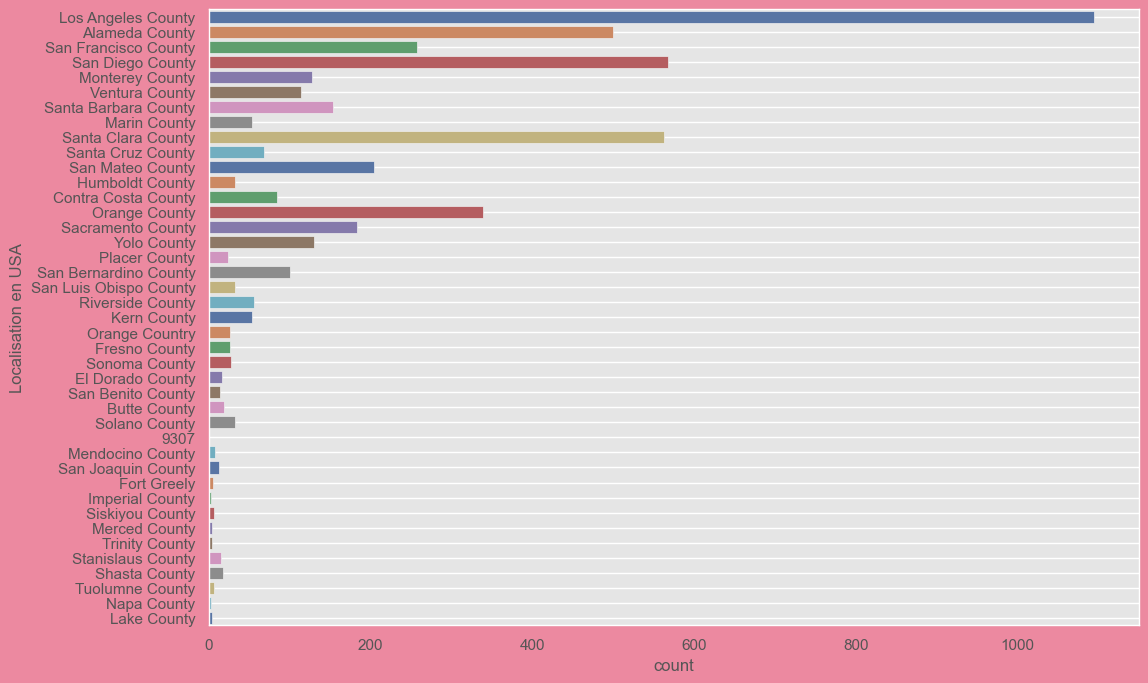

In [587]:
plt.figure(figsize=(12,8),facecolor='#ec89a0')
sns.countplot(data=df_loan,y='Location',palette='deep')
plt.xlabel('count')
plt.ylabel('Localisation en USA')
plt.grid()
plt.show()

On remarque Los Angeles est le pays ou il y'a plus de clients 

# Correction des types de données

In [617]:
# conversion d'une variable catégorielle en type de catégorie
category_col = ['PersonalLoan', 'SecuritiesAccount','Family', 'CDAccount', 'Online', 'CreditCard', 'ZIPCode', 'Education','Location']
df_loan[category_col] = df_loan[category_col].astype('category')
category_col

['PersonalLoan',
 'SecuritiesAccount',
 'Family',
 'CDAccount',
 'Online',
 'CreditCard',
 'ZIPCode',
 'Education',
 'Location']

In [187]:
df_loan[df_loan['Experience']<0]['Age'].describe()


count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

D'apres les analyses on a 52 clients  qui ont une valeur negatifs dans leurs experiences 
dont la tranche  d'âge 23 - 30 ont des valeurs négatives dans l'expérience.
L'âge minimal est 23 ans qui ont des expériences négatifs et le max est 29 c'est a dire que nos valeurs négatifs se situe entre ces deux âges 

In [188]:
df_loan[df_loan["Experience"]<0].sort_values(by="Experience",ascending=True)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Location
4514,4515,24,-3,41,91768,4,1.000000,3,0,0,0,0,1,0,Los Angeles County
2618,2619,23,-3,55,92704,3,2.400000,2,145,0,0,0,1,0,Orange County
4285,4286,23,-3,149,93555,2,7.200000,1,0,0,0,0,1,0,Kern County
3626,3627,24,-3,28,90089,4,1.000000,3,0,0,0,0,0,0,Los Angeles County
2717,2718,23,-2,45,95422,4,0.600000,2,0,0,0,0,1,1,Lake County
2876,2877,24,-2,80,91107,2,1.600000,3,238,0,0,0,0,0,Los Angeles County
3130,3131,23,-2,82,92152,2,1.800000,2,0,0,1,0,0,1,San Diego County
2466,2467,24,-2,80,94105,2,1.600000,3,0,0,0,0,1,0,San Francisco County
3796,3797,24,-2,50,94920,3,2.400000,2,0,0,1,0,0,0,Marin County
2962,2963,23,-2,81,91711,2,1.800000,2,0,0,0,0,0,0,Los Angeles County


In [599]:
df_loan.groupby(['Age','Education'])['Experience'].describe().T

Age          23          24                25                26        ...  \
Education     1     2     1     2     3     1     2     3     1     2  ...   
count      7.00  5.00 13.00  8.00  7.00 23.00 11.00 19.00 30.00 24.00  ...   
mean      -1.29 -2.20 -0.69 -0.88 -2.00  0.52 -0.27 -0.53  1.43  0.75  ...   
std        0.76  0.45  0.95  0.64  1.00  0.79  0.65  0.70  0.82  0.85  ...   
min       -3.00 -3.00 -2.00 -2.00 -3.00 -1.00 -1.00 -2.00  0.00 -1.00  ...   
25%       -1.00 -2.00 -2.00 -1.00 -2.50  0.00 -1.00 -1.00  1.00  0.00  ...   
50%       -1.00 -2.00  0.00 -1.00 -2.00  1.00  0.00 -1.00  2.00  1.00  ...   
75%       -1.00 -2.00  0.00 -0.75 -2.00  1.00  0.00  0.00  2.00  1.00  ...   
max       -1.00 -2.00  0.00  0.00  0.00  1.00  1.00  1.00  2.00  2.00  ...   

Age          64    65                66                67              
Education     3     1     2     3     1     2     3     1     2     3  
count     30.00 30.00 23.00 27.00  9.00  5.00 10.00  5.00  3.00  4.00  
mean      38.53 39.87 40.09 39.52 41.11 41.40 40.40 41.60 42.67 41.50  
std        1.76  0.73  0.73  1.55  0.33  0.55  1.65  0.89  0.58  0.58  
min       34.00 39.00 39.00 35.00 41.00 41.00 36.00 41.00 42.00 41.00  
25%       38.00 39.00 40.00 39.00 41.00 41.00 40.25 41.00 42.50 41.00  
50%       39.00 40.00 40.00 40.00 41.00 41.00 41.00 41.00 43.00 41.50  
75%       40.00 40.00 41.00 41.00 41.00 42.00 41.00 42.00 43.00 42.00  
max       40.00 41.00 41.00 41.00 42.00 42.00 42.00 43.00 43.00 42.00  

[8 rows x 134 columns]


Ces expérience semble être négative pour toutes les observations avec comme âge de 23 et 24 ans et quelques autres. Sur la base de leur âge et de leur éducation, il semble que les valeurs étaient négatives par erreur. donc le changer en valeurs absolues les expérience négatifs

In [197]:
#on va essayé de corrigé les valeurs negatifs de l'Expérience
df_loan['Experience']=df_loan['Experience'].abs()


In [198]:
df_loan[df_loan['Experience']==0]['Age'].describe()

count    66.000000
mean     25.636364
std       1.145377
min      24.000000
25%      25.000000
50%      26.000000
75%      26.000000
max      30.000000
Name: Age, dtype: float64

In [602]:
df_loan[['Age','Experience','Income', 'CCAvg', 'Mortgage']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,5000.00,20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
CCAvg,5000.00,1.94,1.75,0.00,0.70,1.50,2.50,10.00
Mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00


In [603]:
for column in category_col:
    print(df_loan[column].value_counts())
    print("#"*40)

0    4520
1     480
Name: PersonalLoan, dtype: int64
########################################
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
########################################
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
########################################
0    4698
1     302
Name: CDAccount, dtype: int64
########################################
1    2984
0    2016
Name: Online, dtype: int64
########################################
0    3530
1    1470
Name: CreditCard, dtype: int64
########################################
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
9307       1
94598      1
Name: ZIPCode, Length: 467, dtype: int64
########################################
1    2096
3    1501
2    1403
Name: Education, dtype: int64
########################################
Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda C

# Observations

La tranche d'âge se situe entre 23 a 67 ans avec une moyenne et median a 45
Le minimun d'experience est 0 avec comme maximum 43 ans 
le revenu annuel sont ranges de 8k a 224k avec une moyenne de 73k median 64 
le maximum de Mortgage est 635k
1095 clients sont de Los Angeles



# Analyse Univariée

In [211]:
def dist_box(data):
 # fonction plots combiné au graph pour un analyse univarié des variables continues
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("Dipsersations des données  "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Moyenne':mean,'Median':median,'Mode':mode})

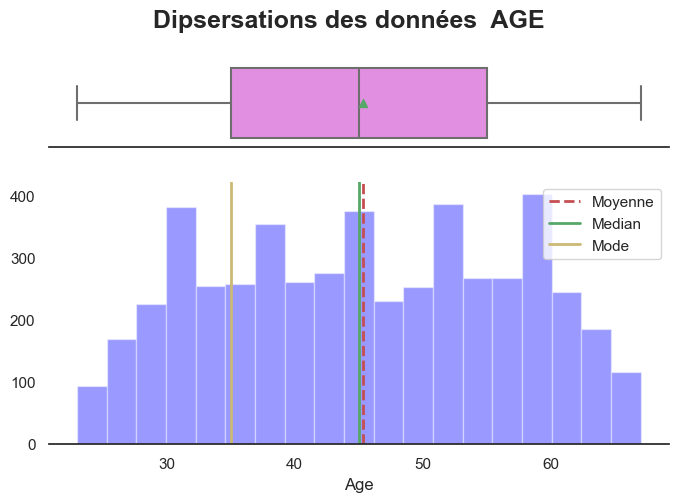

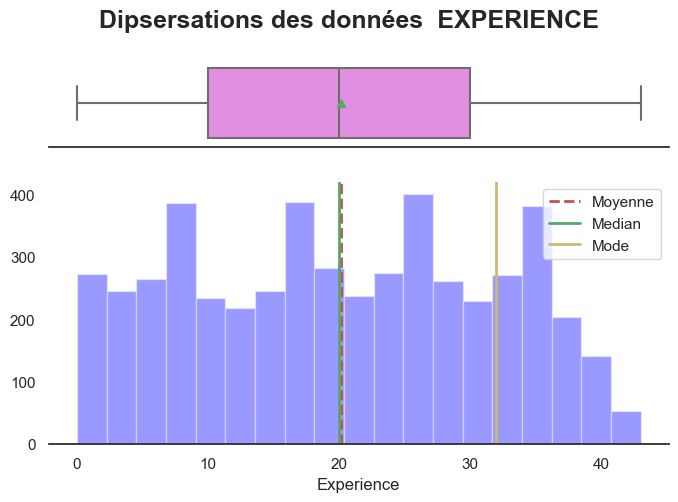

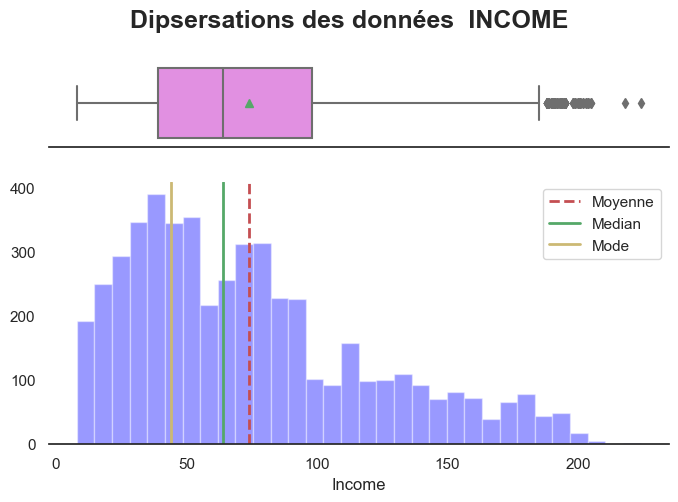

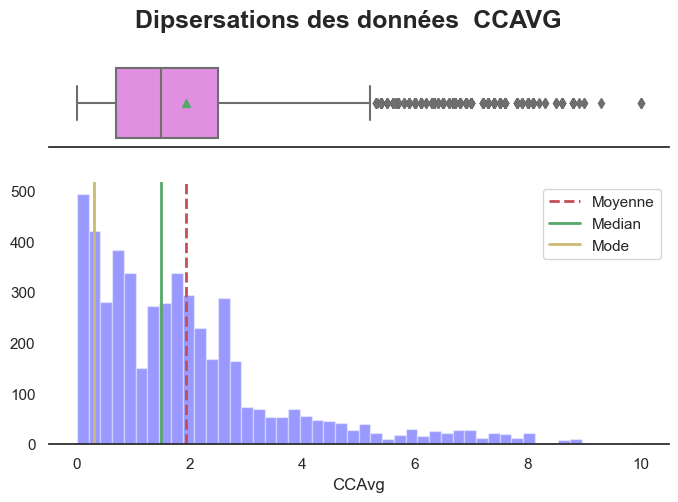

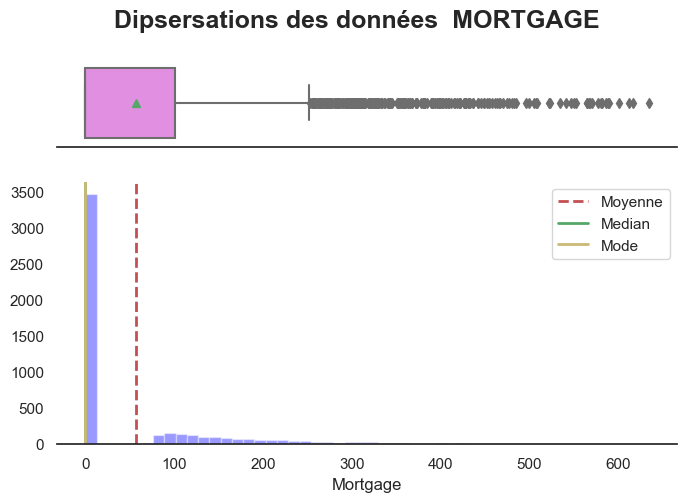

In [212]:
list_col=['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len (list_col)):
    dist_box(df_loan[list_col[i]])

**Observations**

l'age et l'experience ont la même distribution avec un pic a 5 
Le revenu mensuel  est biaisé a droite avec et a une certaines valeurs aberrantes sur le cote supérieur qui peut être coupée
le credit mensuel est trop biaisé et a trop de valeurs aberrantes sur le côté supérieur qui peuvent être coupées 
l'hypothèque est principalement  a zero. biasé a droite et  a trop de valeurs aberrantes qui peuvent être coupées 


Age

L'âge peut être un facteur vital dans l'emprunt d'un prêt en convertissant l'âge en bin pour explorer s'il y'a un modèle

In [607]:
df_loan['AgeBin']=pd.cut(df_loan['Age'],bins=[0,30,40,50,60,100],labels=['18-30','31-40','41-50','51-60','61-100'])

Revenu annuel(Income)

Pour comprendre les segments de clients on va crée  de nouvelles colonnes qui nous aideront a identifié si le client appartient au groupe a revenu supérieur moyen ou inférieur




In [608]:
df_loan['Income_group']=pd.cut(x=df['Income'],
                              bins=[0,50,140,224],
                              labels=['lower','Middle','High'])

Pour comprendre ce que les clients depensés on va crée de nouvelles colonnes qui nous  diront si le client appartient aux depenses supérieur moyennes ou inférieures

In [609]:
df_loan.CCAvg.describe()

count   5000.00
mean       1.94
std        1.75
min        0.00
25%        0.70
50%        1.50
75%        2.50
max       10.00
Name: CCAvg, dtype: float64

In [610]:
df_loan["Spending_group"] = pd.cut( x=df_loan["CCAvg"],
                                   bins=[0.00000, 0.70000, 2.50000, 10.00000],
                                    labels=["Low", "Medium", "High"],include_lowest=True )

In [611]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 5000 non-null   int64   
 1   Age                5000 non-null   int64   
 2   Experience         5000 non-null   int64   
 3   Income             5000 non-null   int64   
 4   ZIPCode            5000 non-null   int64   
 5   Family             5000 non-null   int64   
 6   CCAvg              5000 non-null   float64 
 7   Education          5000 non-null   int64   
 8   Mortgage           5000 non-null   int64   
 9   PersonalLoan       5000 non-null   int64   
 10  SecuritiesAccount  5000 non-null   int64   
 11  CDAccount          5000 non-null   int64   
 12  Online             5000 non-null   int64   
 13  CreditCard         5000 non-null   int64   
 14  Location           5000 non-null   object  
 15  Spending_group     5000 non-null   category
 16  Income

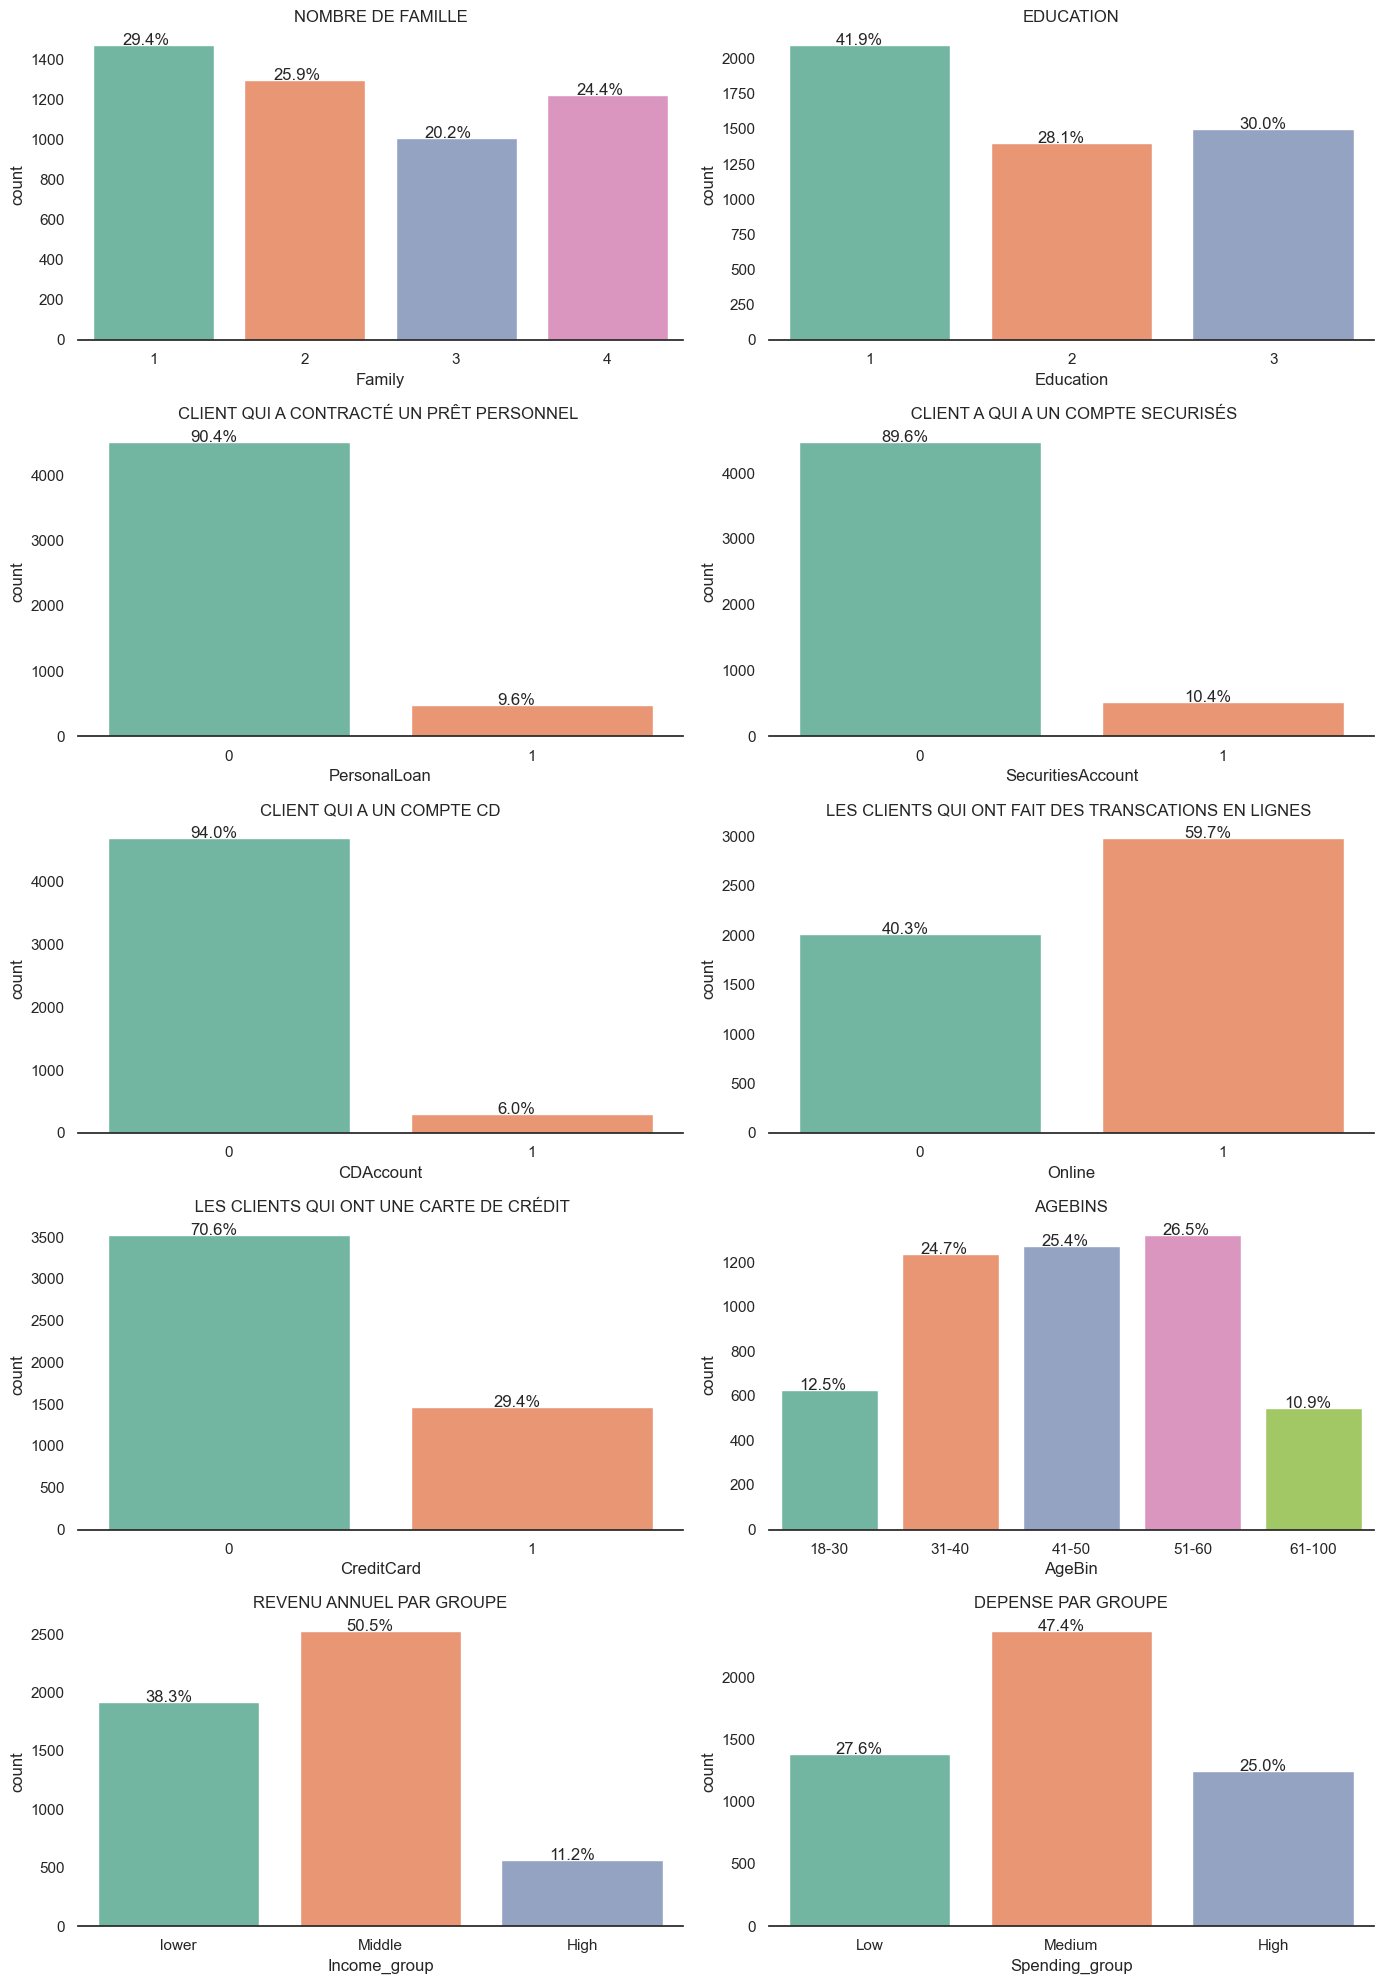

In [235]:
cat_columns=['Family','Education','PersonalLoan','SecuritiesAccount',
               'CDAccount','Online','CreditCard','AgeBin','Income_group','Spending_group']

title=['Nombre de famille','Education','Client qui a contracté un prêt personnel ',
       ' Client qui a un compte de titre','Client qui a un compte CD',
       'Les clients qui ont fait des transcations en lignes ',' Les clients qui ont une carte de crédit'
       ,'Agebins',"Revenu Annuel par groupe",'Depense par groupe']

plt.figure(figsize=(14,20))

sns.set_theme(style="white")

for i, variable in enumerate(cat_columns):
                plt.subplot(5,2,i+1)
                order=df_loan[variable].value_counts(ascending=False).index
                #sns.set_palette(list_palette[i]) # to set the palette
                sns.set_palette('Set2')
                ax=sns.countplot(x=df_loan[variable],data=df_loan)
                sns.despine(top=True,right=True,left=True)
                for p in ax.patches:
                    percentage="{:.1f}%".format(100 * p.get_height() / len(df_loan[variable]))
                    x=p.get_x() + p.get_width()/2-0.05
                    y=p.get_y() + p.get_height()
                    plt.annotate(percentage,(x,y),ha='center')
                plt.tight_layout()
                plt.title(title[i].upper())

 29.4% des clients sont celibataires
 
 41.9% des clients sont du  premier cycle
 
 9.6% des clients ont acheté un prêt personnel a la banque
 
 10.4% des clients ont un compte de titre auprès de la banque
 
 6.0% des clients ont  un compte CD
 
 59.7% des clients effectuent  des transcations en ligne 
 
 29.4% des clients ont  des cartes de crédit 
 
 ~75% des clients se situent entre 31 et 60
 
 ~50% la plupart des clients de la banques appartiennent a un groupe a revenu intermédiaire
 
 ~48% des clients ont des dépenses en  moyennes 


In [239]:
df_loan.groupby(['Location','PersonalLoan'])['PersonalLoan'].agg({'size'}).unstack()


size       
PersonalLoan                0      1
Location                            
9307                      1.0    NaN
Alameda County          456.0   44.0
Butte County             17.0    2.0
Contra Costa County      73.0   12.0
El Dorado County         16.0    1.0
Fort Greely               6.0    NaN
Fresno County            24.0    2.0
Humboldt County          30.0    2.0
Imperial County           3.0    NaN
Kern County              47.0    7.0
Lake County               4.0    NaN
Los Angeles County      984.0  111.0
Marin County             48.0    6.0
Mendocino County          7.0    1.0
Merced County             4.0    NaN
Monterey County         113.0   15.0
Napa County               3.0    NaN
Orange Country           24.0    3.0
Orange County           309.0   30.0
Placer County            22.0    2.0
Riverside County         50.0    6.0
Sacramento County       169.0   15.0
San Benito County        14.0    NaN
San Bernardino County    98.0    3.0
San Diego County        509.0   59.0
San Francisco County    238.0   19.0
San Joaquin County       12.0    1.0
San Luis Obispo County   28.0    5.0
San Mateo County        192.0   12.0
Santa Barbara County    143.0   11.0
Santa Clara County      492.0   71.0
Santa Cruz County        60.0    8.0
Shasta County            15.0    3.0
Siskiyou County           7.0    NaN
Solano County            30.0    3.0
Sonoma County            22.0    6.0
Stanislaus County        14.0    1.0
Trinity County            4.0    NaN
Tuolumne County           7.0    NaN
Ventura County          103.0   11.0
Yolo County             122.0    8.0

In [620]:
#on va supprimer les Nan 
df_loan.dropna(subset=['Location'],inplace=True)

size     
PersonalLoan              0    1
Location                        
9307                      1    0
Alameda County          456   44
Butte County             17    2
Contra Costa County      73   12
El Dorado County         16    1
Fort Greely               6    0
Fresno County            24    2
Humboldt County          30    2
Imperial County           3    0
Kern County              47    7
Lake County               4    0
Los Angeles County      984  111
Marin County             48    6
Mendocino County          7    1
Merced County             4    0
Monterey County         113   15
Napa County               3    0
Orange Country           24    3
Orange County           309   30
Placer County            22    2
Riverside County         50    6
Sacramento County       169   15
San Benito County        14    0
San Bernardino County    98    3
San Diego County        509   59
San Francisco County    238   19
San Joaquin County       12    1
San Luis Obispo County   28    5
San Mateo County        192   12
Santa Barbara County    143   11
Santa Clara County      492   71
Santa Cruz County        60    8
Shasta County            15    3
Siskiyou County           7    0
Solano County            30    3
Sonoma County            22    6
Stanislaus County        14    1
Trinity County            4    0
Tuolumne County           7    0
Ventura County          103   11
Yolo County             122    8

In [619]:
df_loan.groupby(['Location','PersonalLoan'])['PersonalLoan'].agg({'size'}).unstack()

size     
PersonalLoan              0    1
Location                        
9307                      1    0
Alameda County          456   44
Butte County             17    2
Contra Costa County      73   12
El Dorado County         16    1
Fort Greely               6    0
Fresno County            24    2
Humboldt County          30    2
Imperial County           3    0
Kern County              47    7
Lake County               4    0
Los Angeles County      984  111
Marin County             48    6
Mendocino County          7    1
Merced County             4    0
Monterey County         113   15
Napa County               3    0
Orange Country           24    3
Orange County           309   30
Placer County            22    2
Riverside County         50    6
Sacramento County       169   15
San Benito County        14    0
San Bernardino County    98    3
San Diego County        509   59
San Francisco County    238   19
San Joaquin County       12    1
San Luis Obispo County   28    5
San Mateo County        192   12
Santa Barbara County    143   11
Santa Clara County      492   71
Santa Cruz County        60    8
Shasta County            15    3
Siskiyou County           7    0
Solano County            30    3
Sonoma County            22    6
Stanislaus County        14    1
Trinity County            4    0
Tuolumne County           7    0
Ventura County          103   11
Yolo County             122    8

<AxesSubplot:ylabel='Location'>

<Figure size 1500x2400 with 0 Axes>

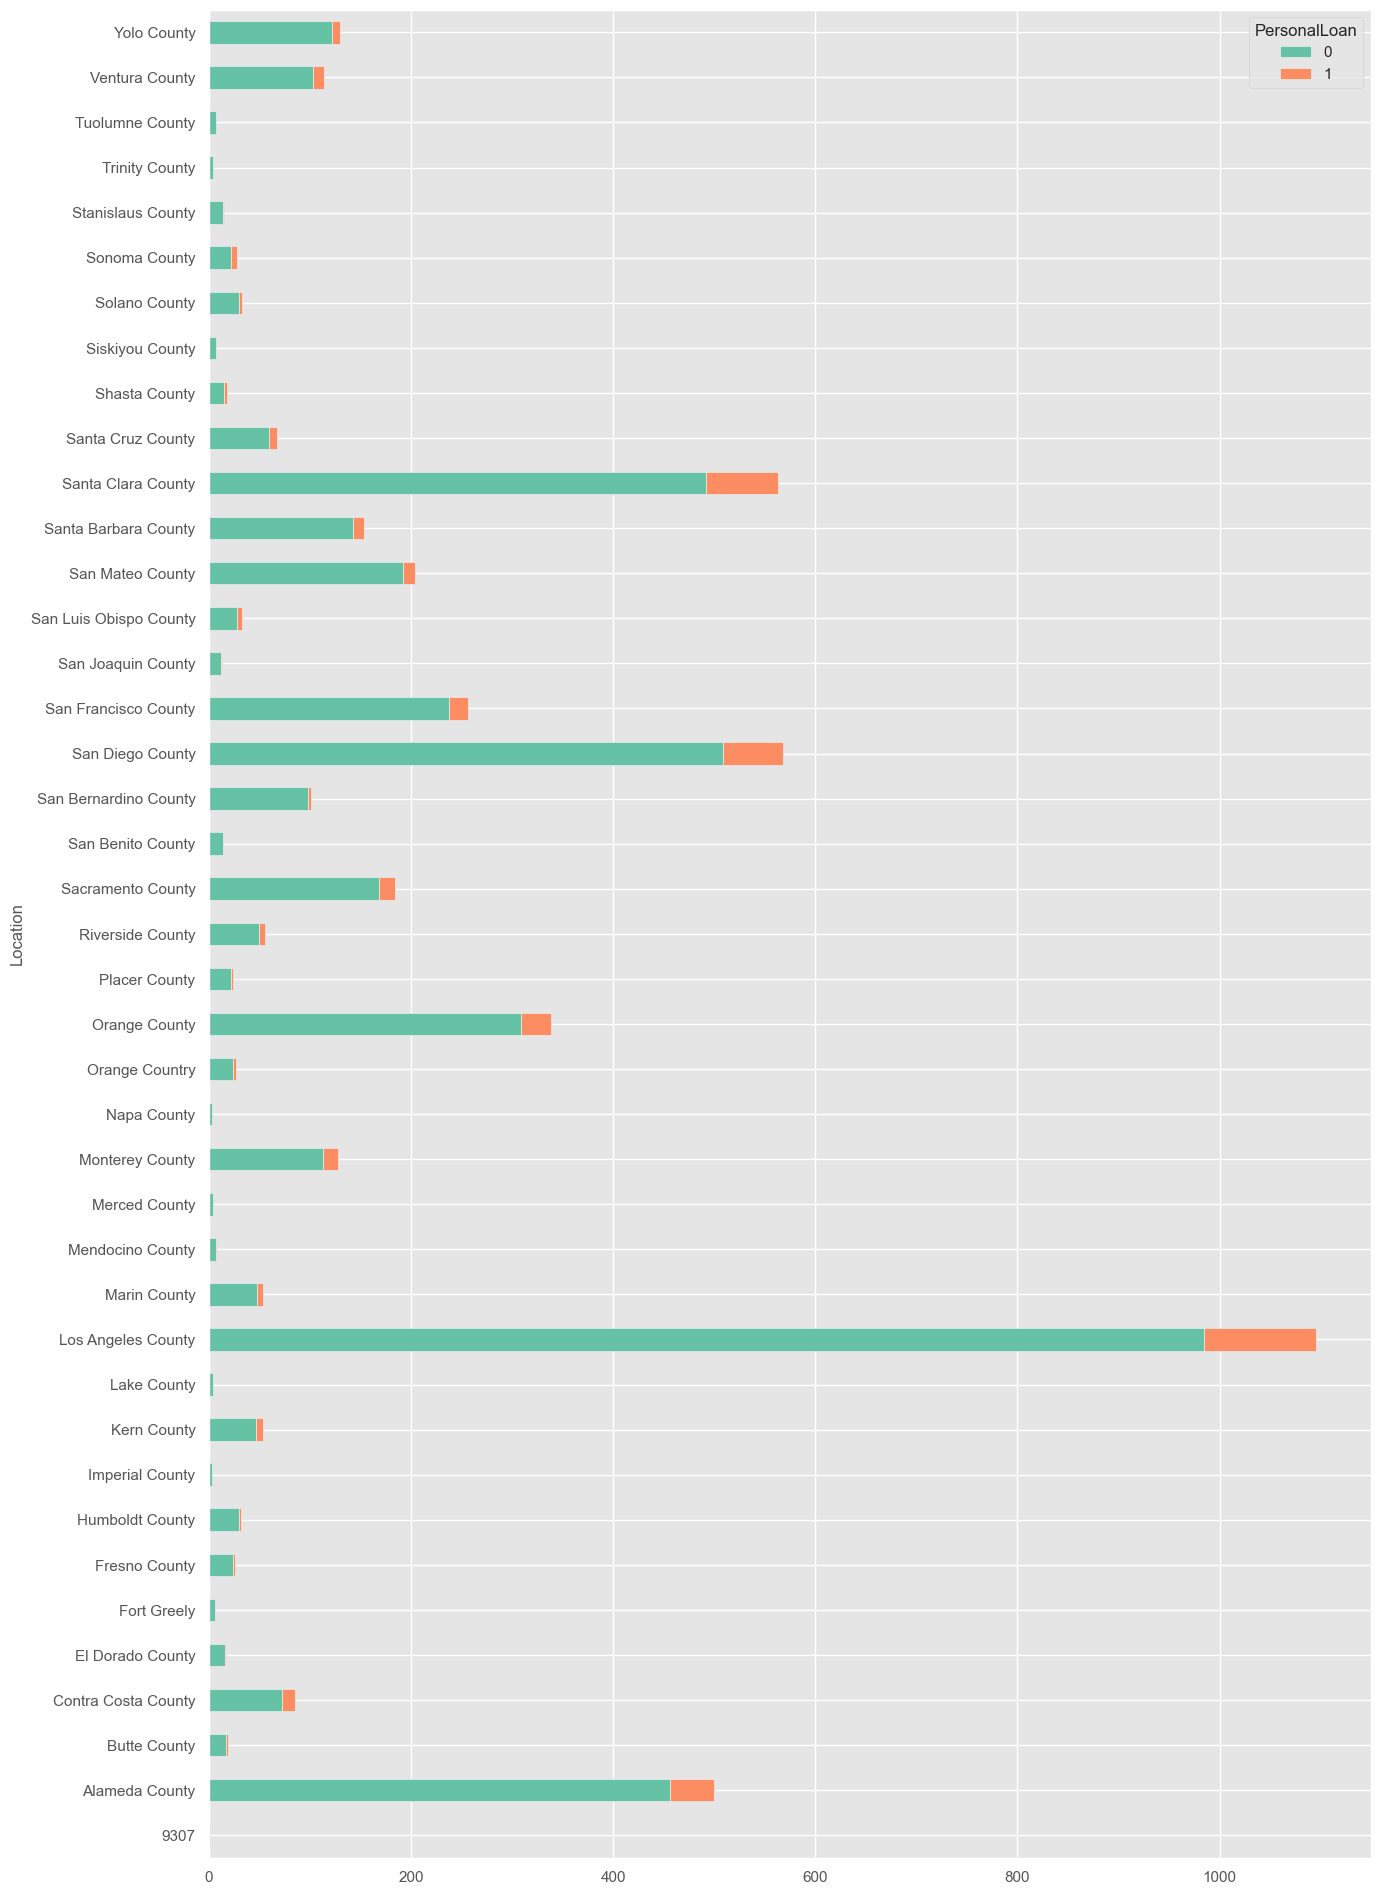

In [621]:
plt.figure(figsize=(15,24))
pd.crosstab(index=df_loan['Location'],columns=df_loan['PersonalLoan'].sort_values(ascending=False
            )).plot(kind="barh" ,stacked=True,figsize=(15,24))

On peut voir que le pourcentage de prêts empruntés differents pays diffère. il y\' a beaucoup de pays leurs conversions en régions nous  aidera dans notre modèle

In [622]:
pays = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',             
'San Bernardino County':'Southern',       
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',           
'Riverside County':'Southern',            
'Kern County':'Southern',                 
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',     
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',               
'Placer County':'Central',                
'Butte County':'Superior',               
'Shasta County':'Superior',                
'El Dorado County':'Central',             
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',           
'Mendocino County':'Superior',             
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                 
'Napa County':'Bay Area',                   
'Imperial County':'Southern',
93077:'Southern',
'Fort Greely ':'Bay Area'}

In [623]:
df_loan['Regions']=df_loan['Location'].map(pays)

In [624]:
df_loan['Regions'].unique()

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior',
       'Central', nan], dtype=object)

In [625]:
df_loan.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
PersonalLoan          0
SecuritiesAccount     0
CDAccount             0
Online                0
CreditCard            0
Location              0
Spending_group        0
Income_group          0
AgeBin                0
Regions              34
dtype: int64

In [262]:
df_loan.dropna(inplace=True)


In [626]:
df_loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 5000 non-null   int64   
 1   Age                5000 non-null   int64   
 2   Experience         5000 non-null   int64   
 3   Income             5000 non-null   int64   
 4   ZIPCode            5000 non-null   category
 5   Family             5000 non-null   category
 6   CCAvg              5000 non-null   float64 
 7   Education          5000 non-null   category
 8   Mortgage           5000 non-null   int64   
 9   PersonalLoan       5000 non-null   category
 10  SecuritiesAccount  5000 non-null   category
 11  CDAccount          5000 non-null   category
 12  Online             5000 non-null   category
 13  CreditCard         5000 non-null   category
 14  Location           5000 non-null   category
 15  Spending_group     5000 non-null   category
 16  Income

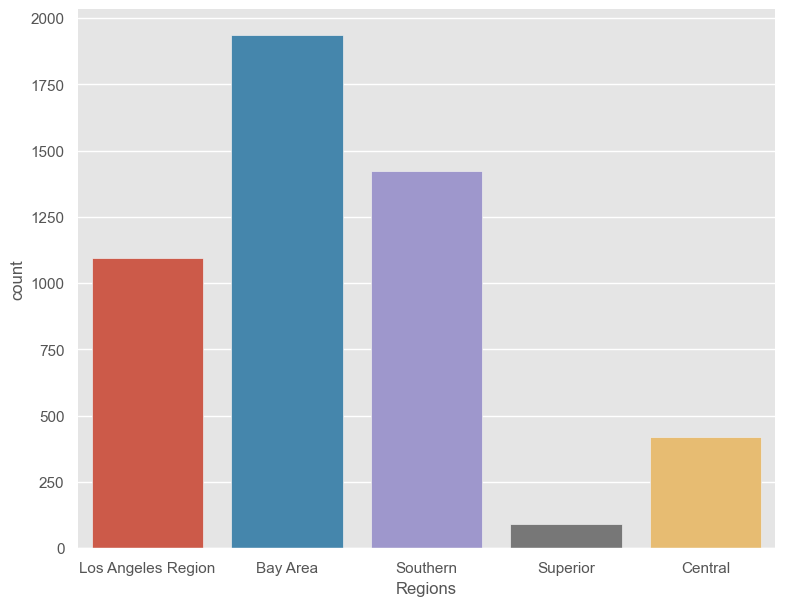

In [281]:
plt.figure(figsize=(9,7))
sns.countplot(data=df_loan,x=df_loan['Regions'])
sns.despine(top=True,right=True,left=True)

# Analyse Bivarié et Multivarié

<function matplotlib.pyplot.show(close=None, block=None)>

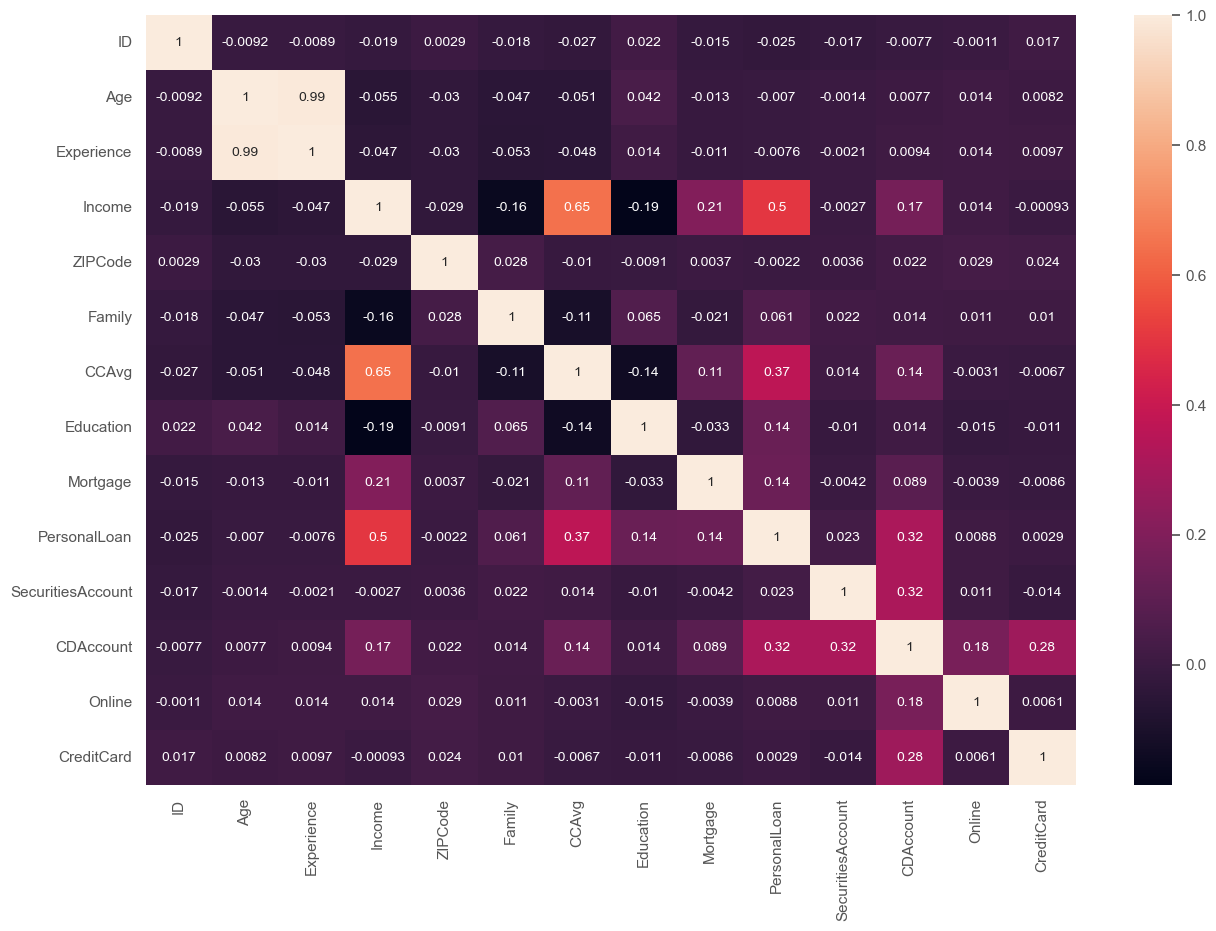

In [284]:
sns.set_palette(sns.color_palette('Set2',8))
plt.figure(figsize=(15,10))
sns.heatmap(df_loan.corr(),annot=True)
plt.show

Comme prévu l\'age et l'expérience sont fortement corrélés et l\'un entre eux peut être abandonné
nous supprimons l\'expérience 
le revenu et les dépenses moyennes sur les cartes de credit sont fortement corrigés de manière positive
L\'hypothèque a tres peu de correlation avec le revenu
CDAccount a peu de correlation  avec SecurititesAccount


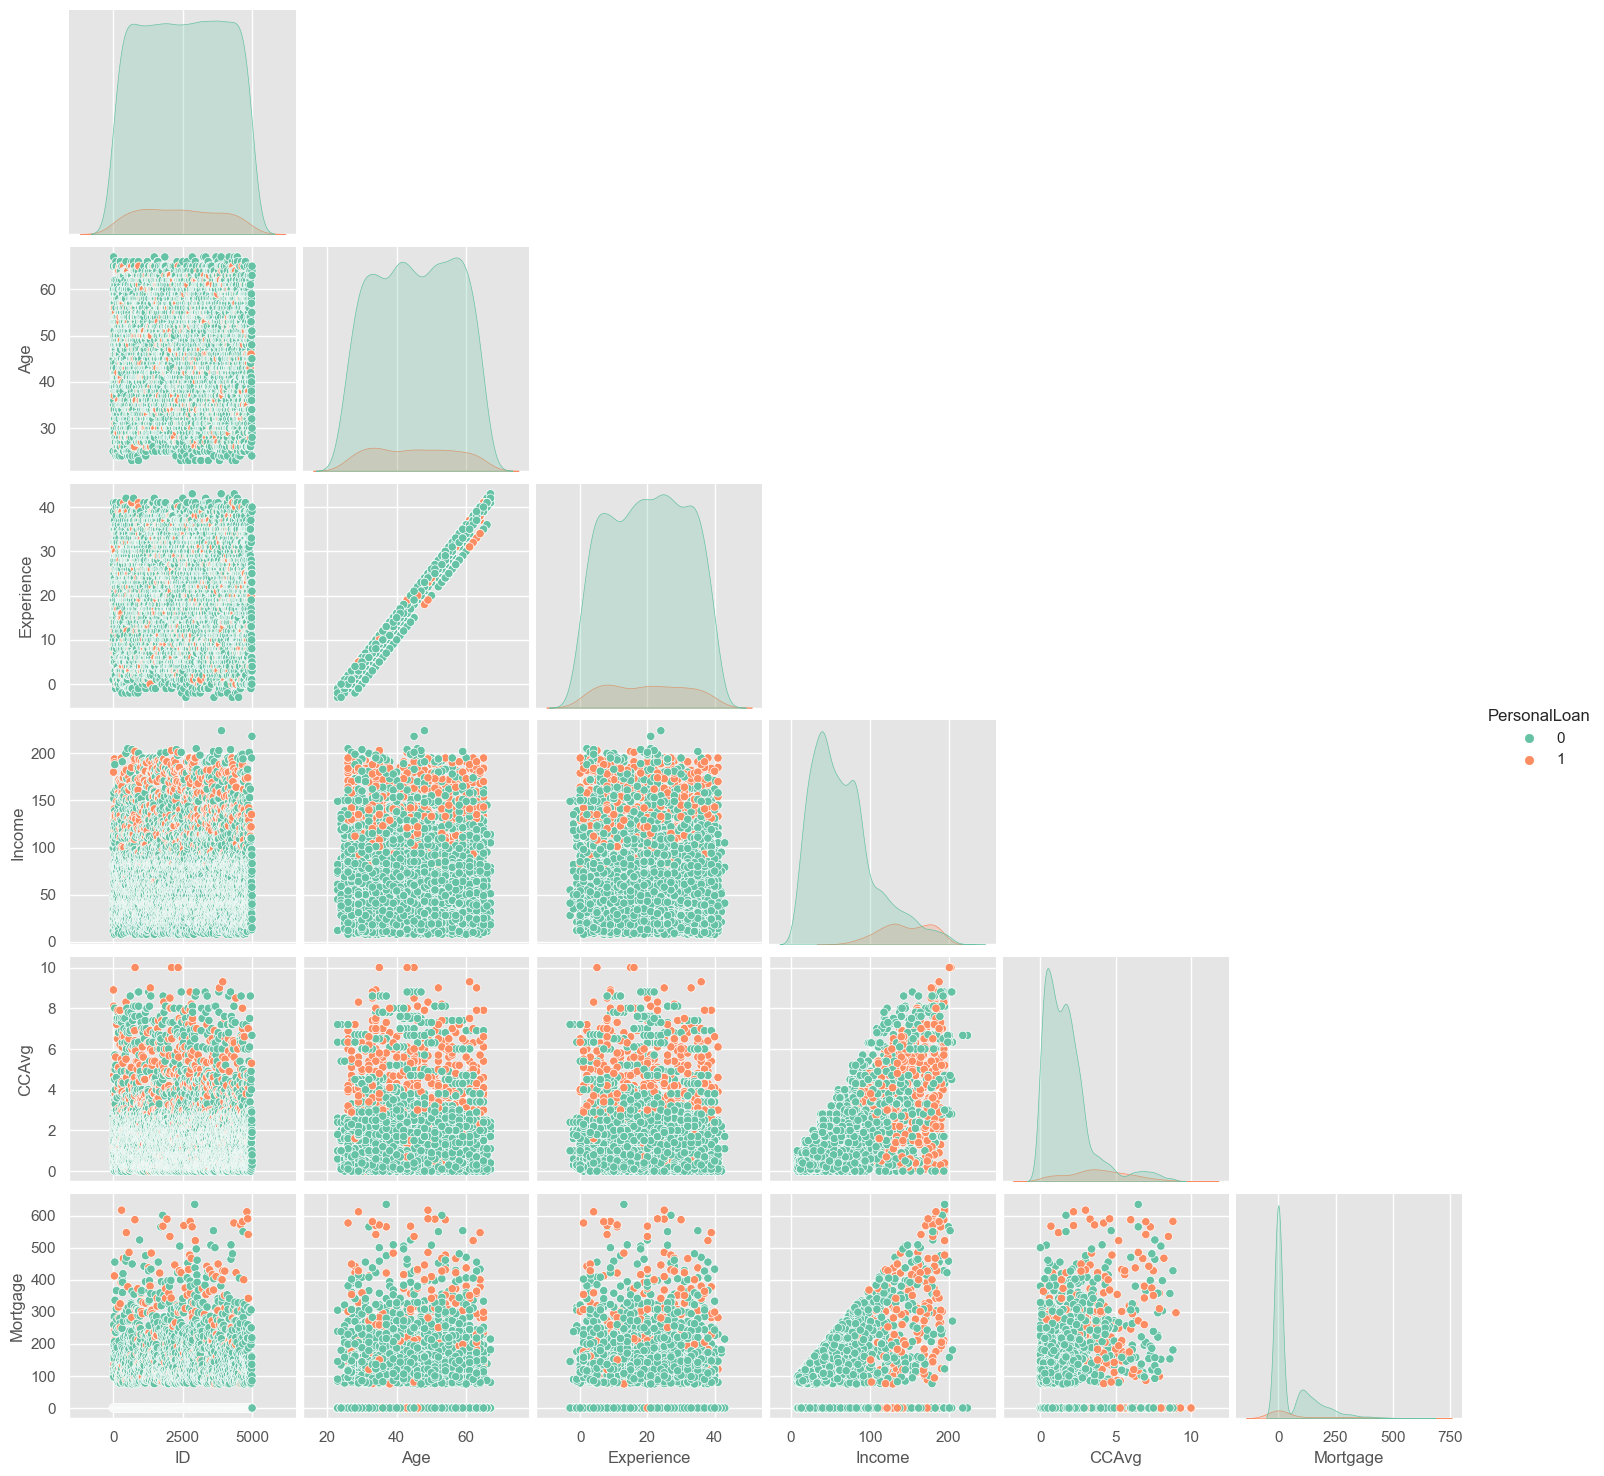

In [627]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.pairplot(df_loan, hue="PersonalLoan",corner=True)
plt.show()

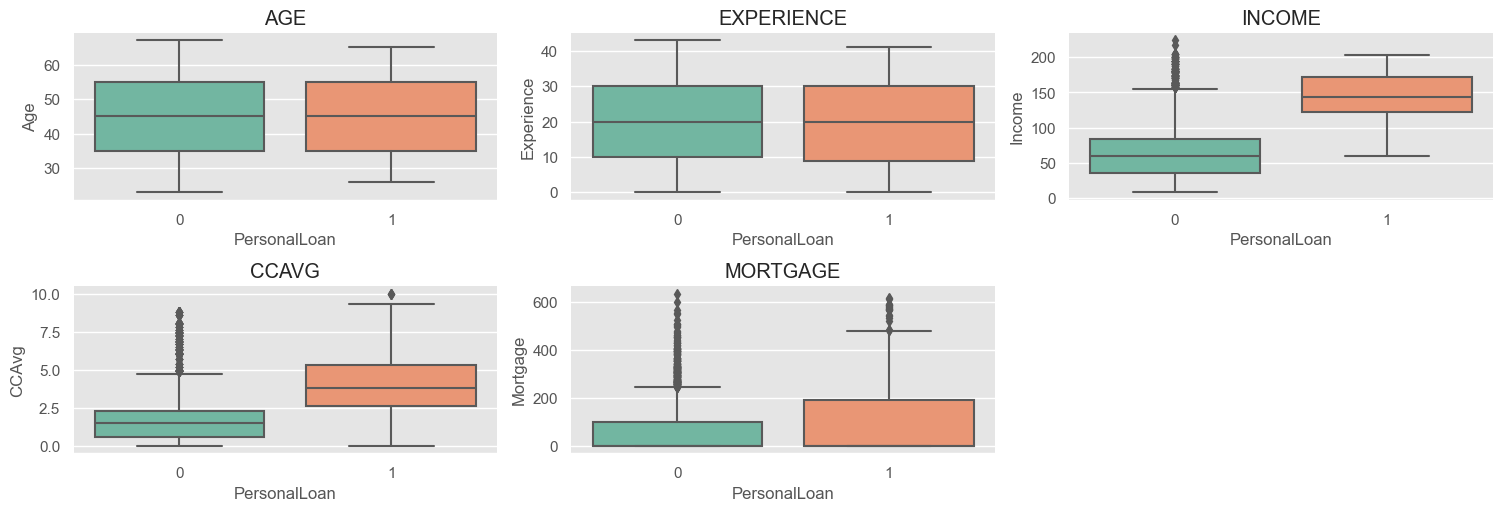

In [293]:
numeric_col=['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(15,25))
sns.set_palette('Set2',8)
for i,variable in enumerate(numeric_col):
    plt.subplot(10,3,i+1)
    
    sns.boxplot(data=df_loan,x="PersonalLoan",y=df_loan[variable])
    sns.despine(top=True,left=True,right=True)
    plt.tight_layout()
    plt.title(variable.upper())

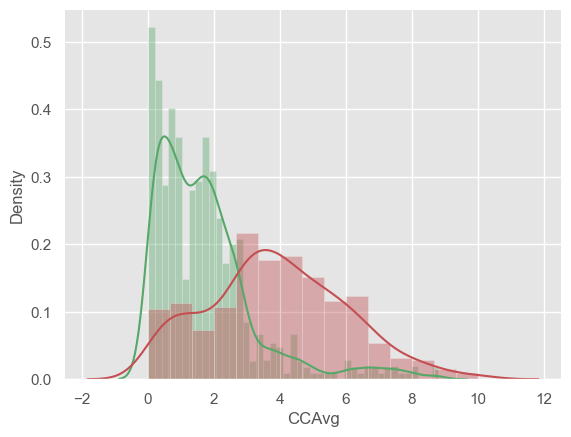

In [294]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['CCAvg'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['CCAvg'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

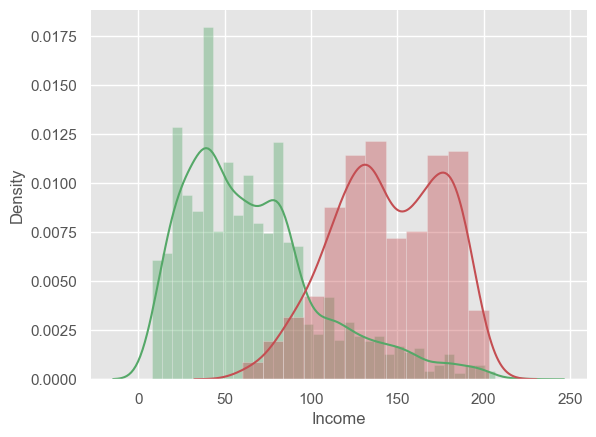

In [299]:
sns.distplot( df_loan[df_loan['PersonalLoan']== 0]['Income'], color='g')
sns.distplot( df_loan[df_loan['PersonalLoan']== 1]['Income'], color='r')
sns.despine(top=True,left=True,right=True)


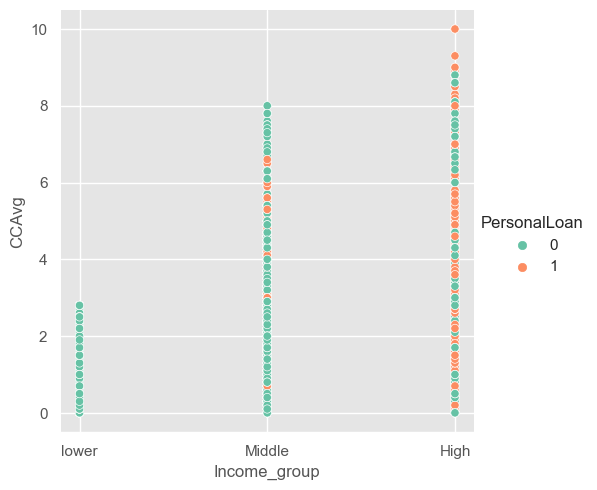

In [300]:
sns.relplot(x='Income_group',y='CCAvg',hue='PersonalLoan',data=df_loan)
sns.despine(top=True,right=True,left=True)

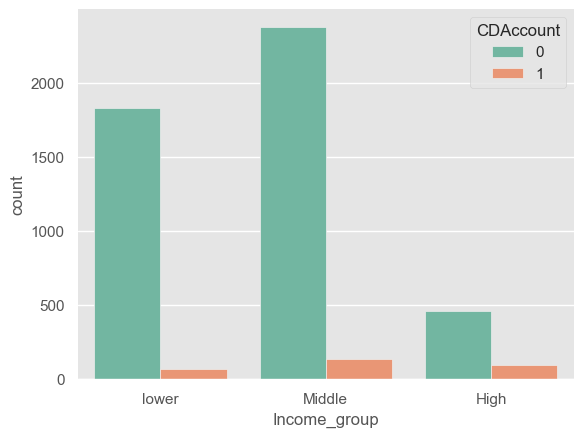

In [301]:
sns.countplot(x='Income_group',hue='CDAccount',data=df_loan)
sns.despine(top=True,right=True,left=True)

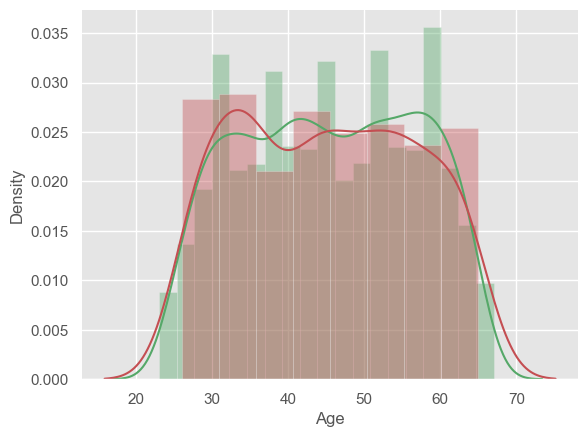

In [304]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Age'],color ='g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]["Age"],color='r')
sns.despine(top=True,left=True,right=True)

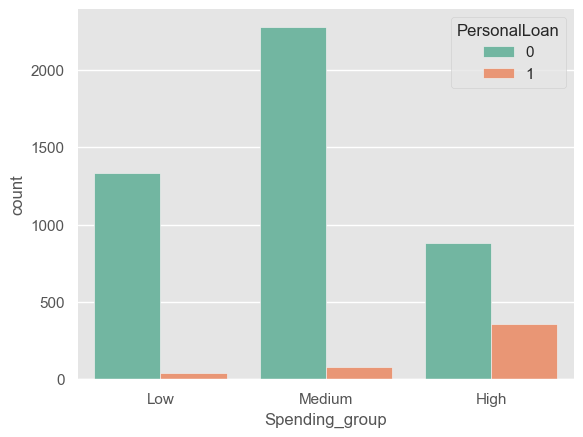

In [306]:
sns.countplot(x="Spending_group",hue="PersonalLoan",data=df_loan)
sns.despine(top=True,left=True,right=True)

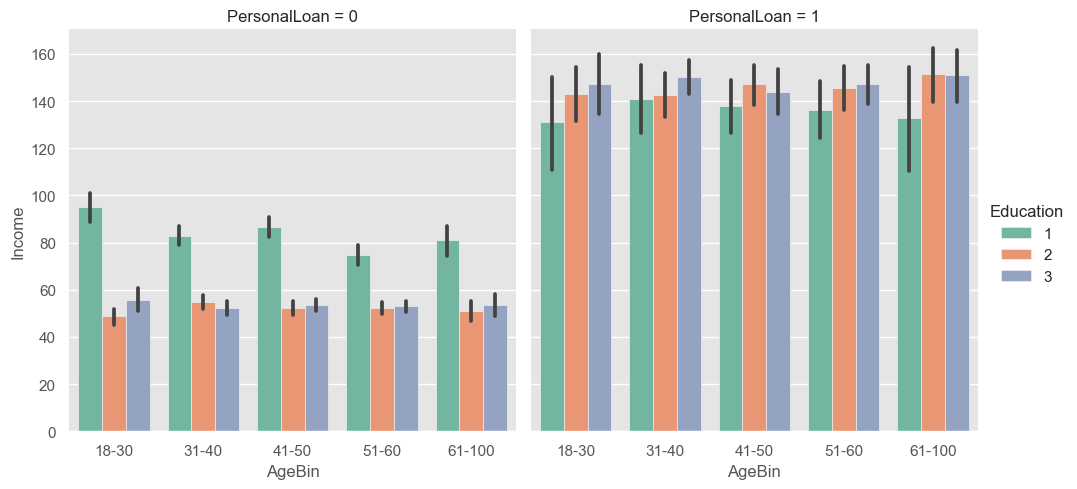

In [308]:
sns.catplot(y='Income',x='AgeBin',hue="Education",kind='bar',col='PersonalLoan',data=df_loan)
sns.despine(top=True,right=True,left=True)

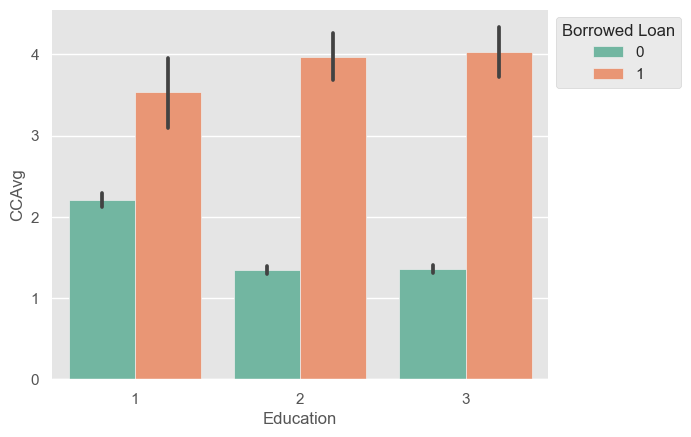

In [628]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.barplot(y='CCAvg',x='Education', hue='PersonalLoan',data=df_loan)
labels=["No","Yes"]
plt.legend(loc="upper left", title="Borrowed Loan",bbox_to_anchor=(1,1))
sns.despine(top=True,right=True,left=True) 

# Observation
les gens ayant un revenun plus élevé avaient deja opté pour un pret personnel

les personnes ayant des pret hypothecaires élevés ont deja opté pour un prêt

les clients ayant une utilisation mensuelle moyenne de crédit plus élevé ont opté pour prêt

les clients ayant un revenu plus élevé avaient une utilisation moyenne de carte de crédit et des hypothèque plus élevé

niveau education ont une utilisation plus élevée de la carte credit et ont emprunté un pret avec la banque 

In [629]:
def stacked_plot(x):
    sns.set_palette(sns.color_palette("Set2",8))
    tab1 =pd.crosstab(x,df_loan["PersonalLoan"],margins=True)
    print(tab1)
    print('-'*120)
    tab=pd.crosstab(x,df_loan['PersonalLoan'],normalize='index')
    tab.plot(kind="bar",stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=(['NON',"OUI"])
    plt.legend(loc="lower left",frameon=False)
    plt.legend(loc="upper left",labels=labels,title="Prêt Emprunté",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True)
    plt.show()
    

PersonalLoan     0    1   All
Family                       
1             1365  107  1472
2             1190  106  1296
3              877  133  1010
4             1088  134  1222
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


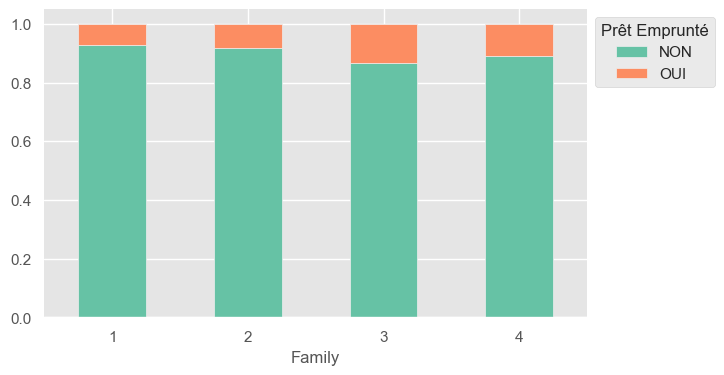

PersonalLoan     0    1   All
Education                    
1             2003   93  2096
2             1221  182  1403
3             1296  205  1501
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


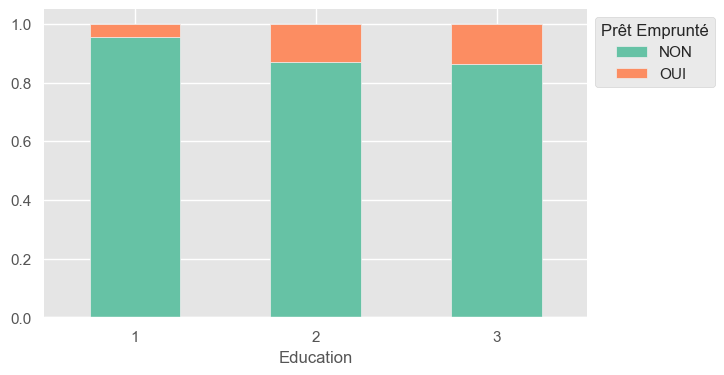

PersonalLoan          0    1   All
SecuritiesAccount                 
0                  4058  420  4478
1                   462   60   522
All                4520  480  5000
------------------------------------------------------------------------------------------------------------------------


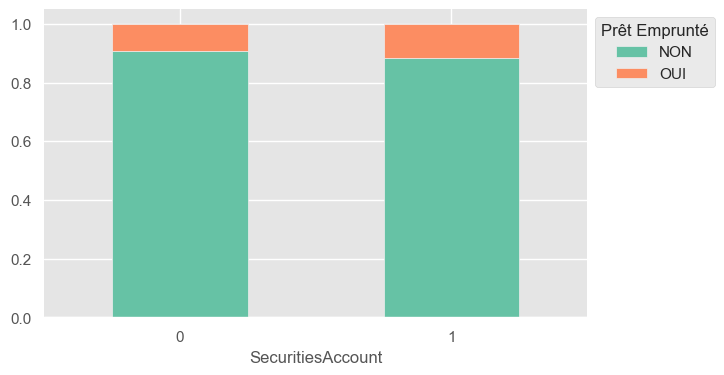

PersonalLoan     0    1   All
CDAccount                    
0             4358  340  4698
1              162  140   302
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


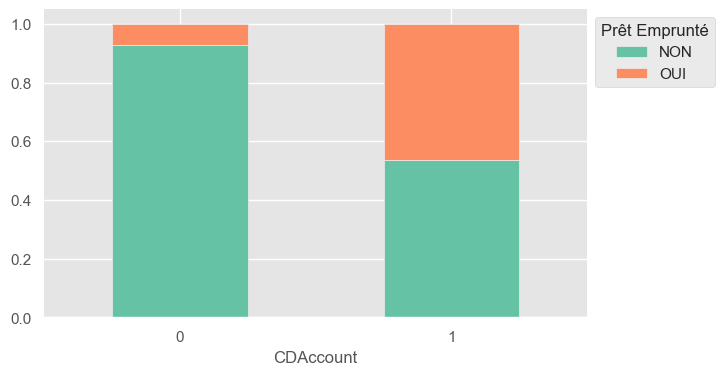

PersonalLoan     0    1   All
CreditCard                   
0             3193  337  3530
1             1327  143  1470
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


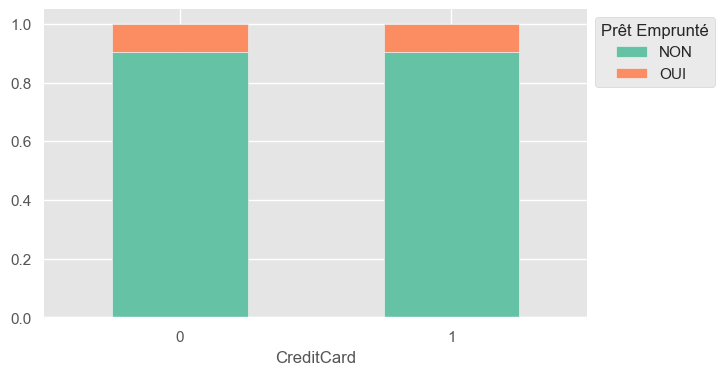

PersonalLoan     0    1   All
Online                       
0             1827  189  2016
1             2693  291  2984
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


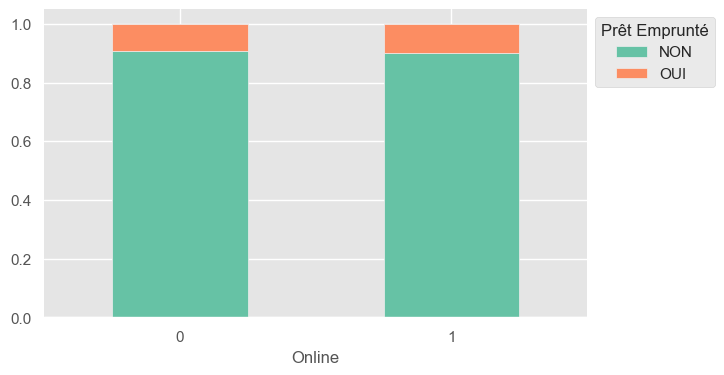

PersonalLoan           0    1   All
Regions                            
Bay Area            1741  196  1937
Central              390   30   420
Los Angeles Region   984  111  1095
Southern            1290  132  1422
Superior              84    8    92
All                 4489  477  4966
------------------------------------------------------------------------------------------------------------------------


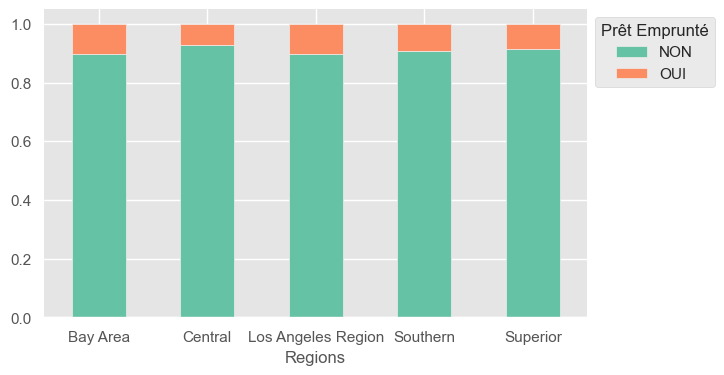

PersonalLoan     0    1   All
AgeBin                       
18-30          558   66   624
31-40         1118  118  1236
41-50         1148  122  1270
51-60         1208  115  1323
61-100         488   59   547
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


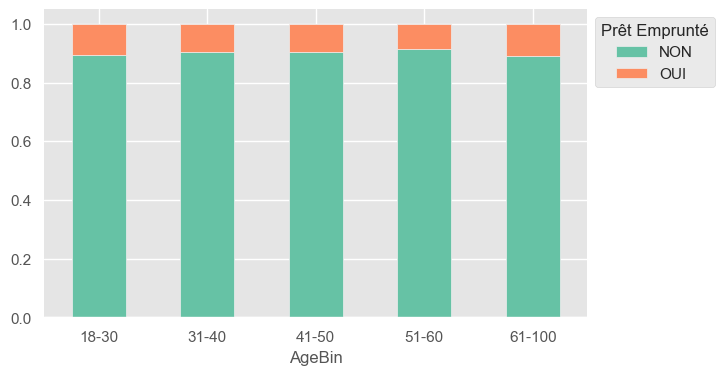

PersonalLoan     0    1   All
Income_group                 
lower         1914    0  1914
Middle        2301  223  2524
High           305  257   562
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


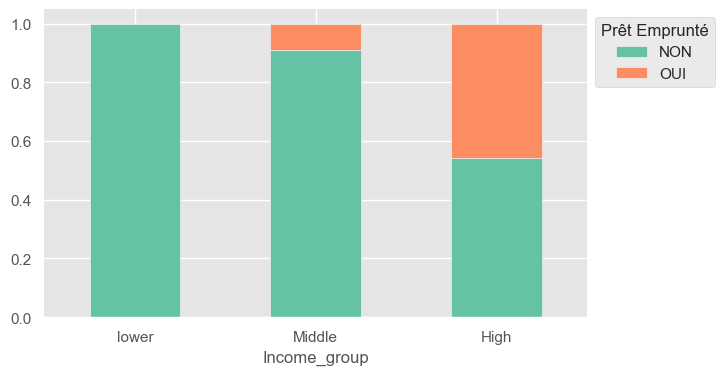

PersonalLoan       0    1   All
Spending_group                 
Low             1342   39  1381
Medium          2292   79  2371
High             886  362  1248
All             4520  480  5000
------------------------------------------------------------------------------------------------------------------------


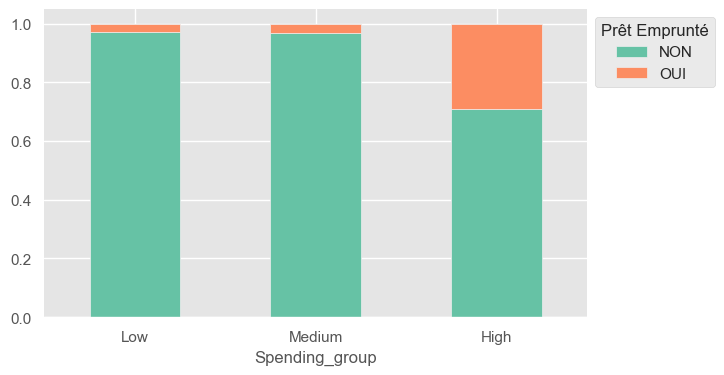

In [630]:
cat_columns=['Family','Education','SecuritiesAccount','CDAccount'
             ,'CreditCard','Online','Regions','AgeBin','Income_group','Spending_group']
for i,variable in enumerate(cat_columns):
    stacked_plot(df_loan[variable])

le nombre de client ayant  de  3 familles qui avaient emprunté des prêts a la banque est plus élevé que 
celui des autres familles
les clients qui ont un niveau 3 qui avaient deja  emprunté prêts a la banque
est plus élevé que celui des autres niveaux 
60 de ceux cliens qui avaient déjà un prêt personnel aupres de la banque avaient dêjà empruntê un prêt
les clients qui utilisent des achats en ligne n'ont aucun impact sur le pret personnel
la majorite des clients qui ont eu un pret perosnnel aupres de la banque n'ont pas utilisé
la majorite des clients qui avaient deja un pret personnel viennent de Los Angeles et de la region de Bay
le ratio de prêt hypothécaires est élevé chez les clients de 30 et moins et chez les clients de 60 plus
les clients ayant une dépense mensuelle moyenne élevée ont deja acheté un prêt personnel

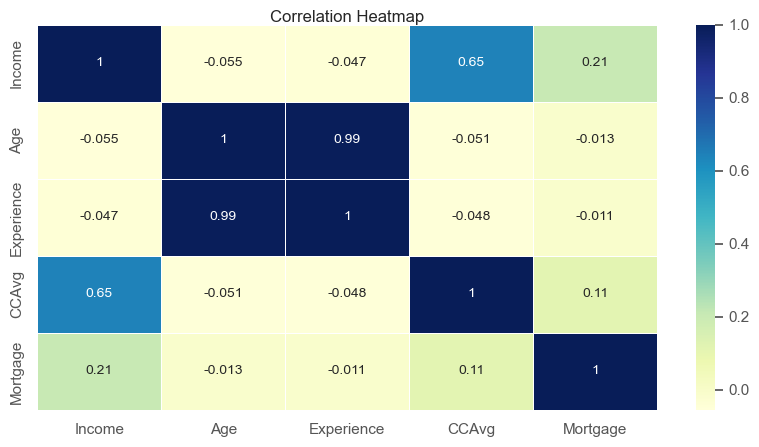

In [328]:
plt.figure(figsize=(10,5))
numerical=['Income','Age',"Experience",'CCAvg','Mortgage']
heatmap=sns.heatmap(df_loan[numerical].corr(),annot=True,cmap='YlGnBu',linewidth=0.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=2);

([<matplotlib.patches.Wedge at 0x7f8c7c609e80>,
 [Text(-1.0502963920234354, 0.3269212273660955, ''),
  Text(1.050296369067002, -0.32692130111797846, '')],
 [Text(-0.5728889411036919, 0.1783206694724157, '90.4%'),
  Text(0.572888928582001, -0.1783207097007155, '9.6%')])

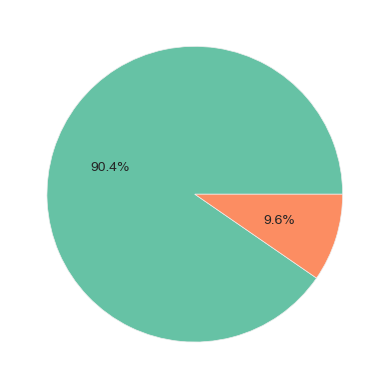

In [329]:
plt.pie(data=df_loan,x=df_loan["PersonalLoan"].value_counts(),autopct='%1.1f%%')


La variable cible personal_loan est très déséquilibrée puisque seuls 9,6 % des clients ont déjà opté pour un prêt personnel dans l'ensemble de données. Cela peut être géré à l'aide de poids.

In [330]:
df_loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Location,AgeBin,Income_group,Spending_group,Regions
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0,Los Angeles County,18-30,lower,Medium,Los Angeles Region
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0,Los Angeles County,41-50,lower,Medium,Los Angeles Region
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0,Alameda County,31-40,lower,Medium,Bay Area
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0,San Francisco County,31-40,Middle,High,Bay Area
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1,Los Angeles County,31-40,lower,Medium,Los Angeles Region


# Resumé EDA


La variable dépendante est le Personal_loan qui est de type de données catégoriel.
Age, Experience, Income,mortage ,CCavg sont de type entier tandis que les autres variables sont de type catégorielles
Il n'y avait pas de valeurs manquantes dans l'ensemble de données

Les personnes ayant des revenus plus élevés avaient opté pour le prêt personnel auparavant.
Les personnes ayant des hypothèques élevées ont opté pour un prêt.
Les clients dont l'utilisation mensuelle moyenne du crédit est plus élevée ont opté pour un prêt.
Les clients avec une famille de 3 membres avaient emprunté les prêts auprès de la banque.
Niveau d'éducation 2 : Diplômé et 3 : Avancé/Professionnel ont contracté des prêts auprès de la banque.
Les clients qui avaient un certificat de dépôt auprès de la banque avaient déjà emprunté un prêt
La majorité des clients qui avaient un prêt personnel auprès de la banque ont utilisé les installations en ligne.
La majorité des clients qui avaient contracté un prêt personnel auparavant proviennent de la région de Los Angeles.
Le ratio de prêt d'emprunt est élevé chez les clients de 30 ans et moins et de 60 ans et plus.
Plus vous gagnez de revenus, plus vous dépensez et avez un style de vie « plus grand que nature 

Les clients à revenu élevé ont des hypothèques plus élevées et des dépenses moyennes mensuelles plus élevées. Ils ont également un certificat de dépôt auprès de la banque. Ce sont nos clients de haut niveau.
Peu de clients du groupe à revenu moyen n'ont pas d'hypothèques plus élevées et ont moins de dépenses mensuelles moyennes par carte de crédit. Ce sont des clients de profil moyen.
Les clients du groupe à faible revenu ont moins d'hypothèques (il y a peu de valeurs aberrantes), moins de dépenses mensuelles. Ce sont nos clients discrets


De nombreuses variables ont des valeurs aberrantes qui doivent être traitées.
Nous pouvons supprimer Experience, Country, Zipcode et Agebin, Income_group, Spending_group.

# Data Cleaning:

Nous avons observé que certaines observations où expérience ont des valeurs negatifs mais comme il y avait une forte corrélation avec l'âge , nous avons abandonné l'expérience.
Il y a 450 codes postaux uniques, nous les avons mappés aux pays. Ils ont ensuite été mappés aux régions pour réduire la dimension des données et nous n'avons maintenant que 5 valeurs distinctes dans les données.
Nous avons également créé une classe d'âge, un groupe de dépenses et un groupe de revenus pour analyser tout modèle d'achat de prêt basé sur ceux-ci.

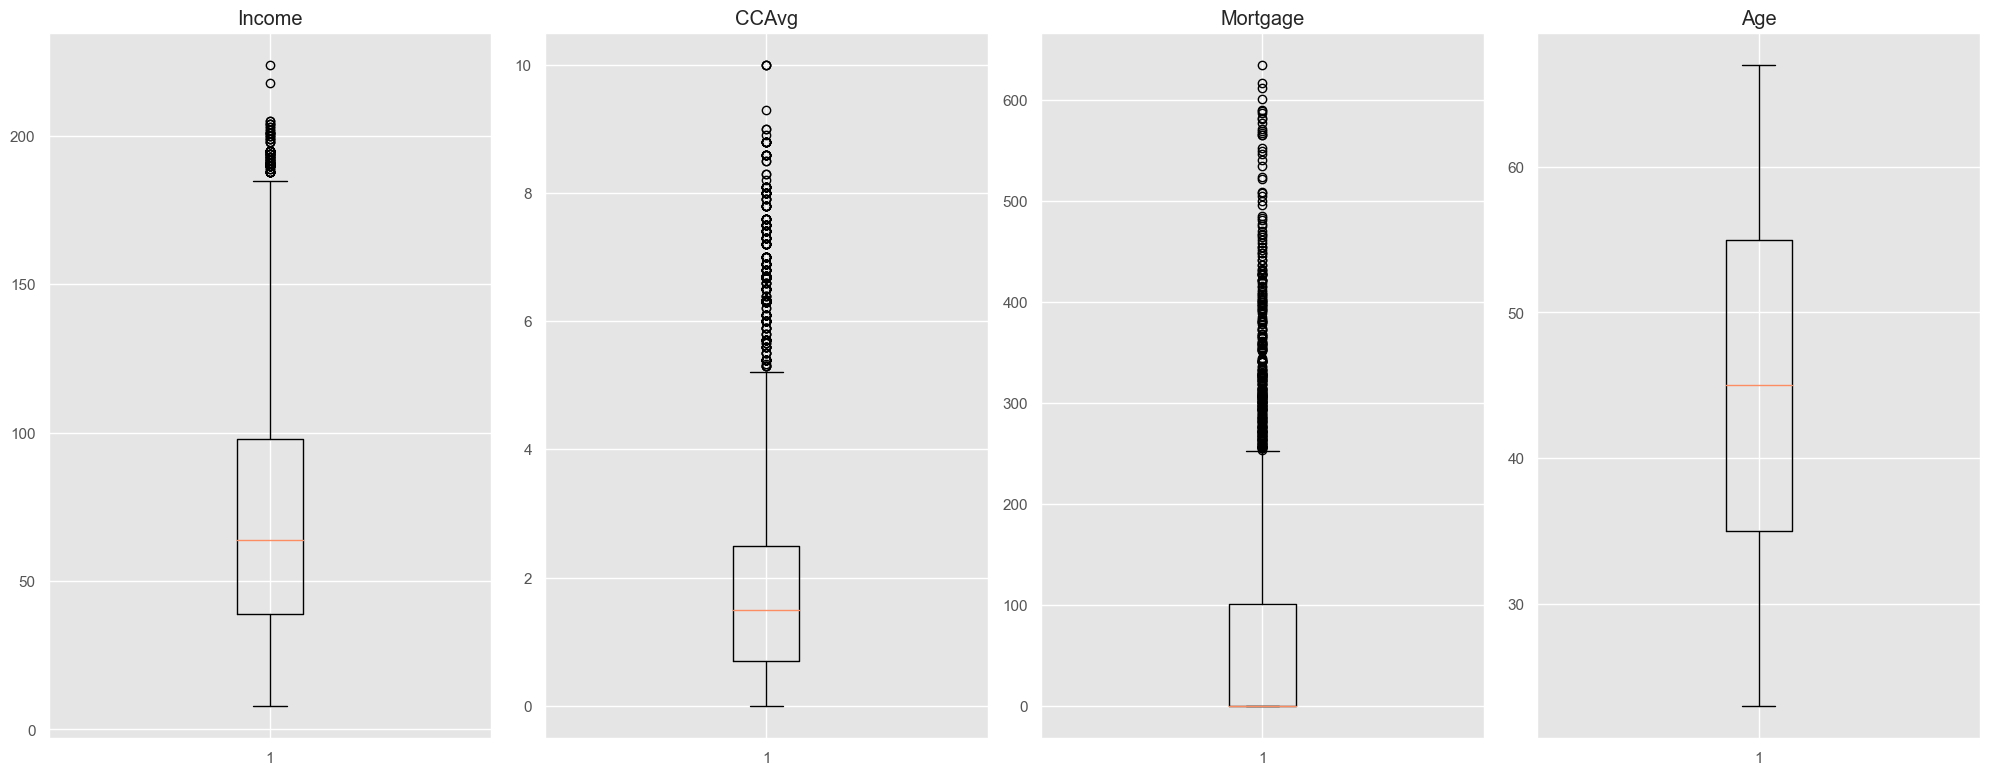

In [639]:
#essyons de voir les variables qui ont des valeurs aberrantes
numeric_columns =['Income','CCAvg','Mortgage','Age']
# outils de detection avec le boxplot pour les valeurs aberrantes
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df_loan[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

In [337]:
df_loan.sort_values(by=['Income'],ascending=False).head()

,ID,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Regions
3896,3897,48,224,2,6.66667,1,0,0,0,1,1,1,Bay Area
4993,4994,45,218,2,6.66667,1,0,0,0,0,1,0,Los Angeles Region
526,527,26,205,1,6.33333,1,271,0,0,0,0,1,Southern
2988,2989,46,205,2,8.80000,1,181,0,1,0,1,0,Central
4225,4226,43,204,2,8.80000,1,0,0,0,0,1,0,Southern


In [341]:
df_loan.sort_values(by=['CCAvg'],ascending=False).head()

,ID,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Regions
2101,2102,35,203,1,10.00000,3,0,1,0,0,0,0,Bay Area
787,788,45,202,3,10.00000,3,0,1,0,0,0,0,Los Angeles Region
2337,2338,43,201,1,10.00000,2,0,1,0,0,0,1,Bay Area
3943,3944,61,188,1,9.30000,2,0,1,0,0,0,0,Southern
3822,3823,63,178,4,9.00000,3,0,1,0,0,0,0,Los Angeles Region


In [342]:
df_loan.sort_values(by=['Mortgage'],ascending=False).head()

,ID,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Regions
2934,2935,37,195,2,6.50000,1,635,0,0,0,1,0,Southern
303,304,49,195,4,3.00000,1,617,1,0,0,0,0,Central
4812,4813,29,184,4,2.20000,3,612,1,0,0,1,0,Southern
1783,1784,53,192,1,1.70000,1,601,0,0,0,1,0,Bay Area
4842,4843,49,174,3,4.60000,2,590,1,0,0,0,0,Superior


In [344]:
# df_loan.loc[(df_loan['Age']==48) & (df_loan['Experience']==24)].sort_values(by=['Income'],ascending=False).head(5)

Comme on a pas trop besoin de certaines variables on va les supprimés

on avait crée certaines valeurs pour mieux analysé vue qu'on aura plus de ces variables on va les supprimes pour aleger les données 

In [333]:
df_loan.drop(columns=["AgeBin", "ZIPCode","Location",'Experience','Income_group','Spending_group'], inplace=True)

In [334]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4966 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4966 non-null   int64  
 1   Age                4966 non-null   int64  
 2   Income             4966 non-null   int64  
 3   Family             4966 non-null   int64  
 4   CCAvg              4966 non-null   float64
 5   Education          4966 non-null   int64  
 6   Mortgage           4966 non-null   int64  
 7   PersonalLoan       4966 non-null   int64  
 8   SecuritiesAccount  4966 non-null   int64  
 9   CDAccount          4966 non-null   int64  
 10  Online             4966 non-null   int64  
 11  CreditCard         4966 non-null   int64  
 12  Regions            4966 non-null   object 
dtypes: float64(1), int64(11), object(1)
memory usage: 672.2+ KB


Nous avons 6 variables indépendantes catégorielles mais 4 d'entre elles sont binaires, donc nous aurons les mêmes résultats avec elles même après avoir créé des variables fictives Nous ne ferons donc que des variables fictives pour les régions et l'éducation.


On va separé les donnêes 

In [450]:
X=df_loan.drop(['PersonalLoan'],axis=1)
Y=df_loan["PersonalLoan"]

In [451]:
oneHotCols=['Regions','Education']
X=pd.get_dummies(X,columns=oneHotCols,drop_first=True)

In [452]:
#Separation des donnêes 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state = 1,stratify=Y)

In [453]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()


In [454]:
X_scaler=scaler.fit(X_train)

In [455]:
X_scaler

StandardScaler()

In [456]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [388]:
X_train_scaled

array([[-1.03434498,  1.3702691 ,  0.82838026, ..., -0.13140247,
        -0.63372936,  1.55495845],
       [ 1.67171829, -0.2072498 ,  1.02494315, ..., -0.13140247,
         1.57796066, -0.643104  ],
       [-1.20447213,  0.05567002,  1.96407696, ..., -0.13140247,
        -0.63372936, -0.643104  ],
       ...,
       [ 0.97523857,  1.3702691 ,  1.04678347, ..., -0.13140247,
        -0.63372936, -0.643104  ],
       [-0.17329329, -1.69712875, -0.50387933, ..., -0.13140247,
        -0.63372936, -0.643104  ],
       [-0.57257129, -1.346569  ,  2.40088338, ..., -0.13140247,
        -0.63372936, -0.643104  ]])

In [457]:
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
Y_train.index=np.arange(len(Y_train))
Y_test.index=np.arange(len(Y_test))


# Critère d'evaluation du modèle


le modèle peut faire des mauvaises prédictions comme:
Prédire qu'un client achetera un prêt alors que non
ou prédire qu'un client n'achetera pas de crédit alors qu'il achete

# Quel est le problème le plus important


Le but de la compagne est d'attirer plus de clents.Le 2ème cas est plus important pour nous .L'equipe des ventes
et marketing manque un client potentiel .C'est une perte d'opportunité .Nous voulons donc minimiser cette perte

# Comment on peut rédire les pertes?c'est a dire reduire les faux negatifs

Par conséquent le recall devrait être maximisé plus le recall est grand,plus les chances d'identifier correctement les
deux classes sont élevées.

In [640]:
def make_confusion_matrix(Y_actual,Y_predict,title):
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(Y_actual, Y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [459]:
#une fonction qui va calculer les metriques 
def get_metrics_score(model,X_train_df,X_test_df,Y_train_pass,Y_test_pass,statsklearn,threshold=0.5,flag=True,roc=False):
    
            score_list=[] 
            if statsklearn==0:
                pred_train = model.predict(X_train_df)
                pred_test = model.predict(X_test_df)
            else:
                pred_train = (model.predict(X_train_df)>threshold)
                pred_test = (model.predict(X_test_df)>threshold)


            pred_train = np.round(pred_train)
            pred_test = np.round(pred_test)

            train_acc = accuracy_score(Y_train_pass,pred_train)
            test_acc = accuracy_score(Y_test_pass,pred_test)

            train_recall = recall_score(Y_train_pass,pred_train)
            test_recall = recall_score(Y_test_pass,pred_test)

            train_precision = precision_score(Y_train_pass,pred_train)
            test_precision = precision_score(Y_test_pass,pred_test)

            train_f1 = f1_score(Y_train_pass,pred_train)
            test_f1 = f1_score(Y_test_pass,pred_test)


            score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))

            if flag == True: 
                print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
                print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",
                      round(accuracy_score(Y_train_pass,pred_train),3),
                      "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
                      round(accuracy_score(Y_test_pass,pred_test),3))
                print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m"
                      ,round(recall_score(Y_train_pass,pred_train),3),
                      "\x1b[0;30;47m \033[1mTest:\x1b[0m" ,
                      round(recall_score(Y_test_pass,pred_test),3))

                print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m",
                      round(precision_score(Y_train_pass,pred_train),3),
                      "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
                      round(precision_score(Y_test_pass,pred_test),3))
                print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",
                      round(f1_score(Y_train_pass,pred_train),3),
                      "\x1b[0;30;47m \033[1mTest:\x1b[0m",
                      round(f1_score(Y_test_pass,pred_test),3))
                make_confusion_matrix(Y_train_pass,pred_train,"Confusion Matrix for Train")     
                make_confusion_matrix(Y_test_pass,pred_test,"Confusion Matrix for Test") 

            if roc == True:

                print("\x1b[0;30;47m \033[1mROC-AUC Score  :Train:\x1b[0m: ",
                      round(roc_auc_score(Y_train_pass,pred_train),3),
                      "\x1b[0;30;47m \033[1mTest:\x1b[0m: ",
                      round(roc_auc_score(Y_test_pass,pred_test),3))

            return score_list # returning the list with train and test scores

In [460]:
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
def add_score_model(score):
     '''Add scores to list so that we can compare all models score together'''   
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])


# Logistic Regression (with Sklearn library)



 MODEL PERFORMANCE
 Accuracy   : Train: 0.656  Test:  0.658
 Recall     : Train: 0.985  Test: 0.979
 Precision  : Train: 0.216  Test:  0.217
 F1         : Train: 0.355  Test: 0.355


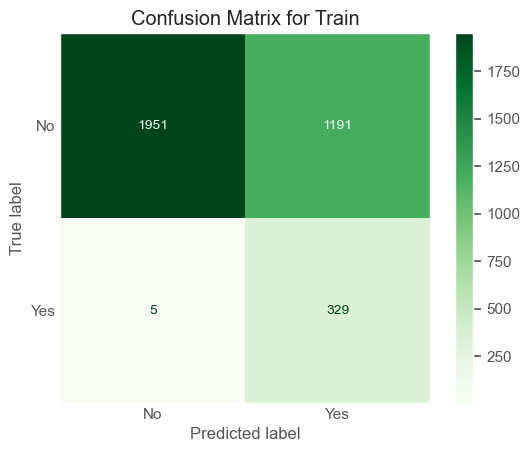

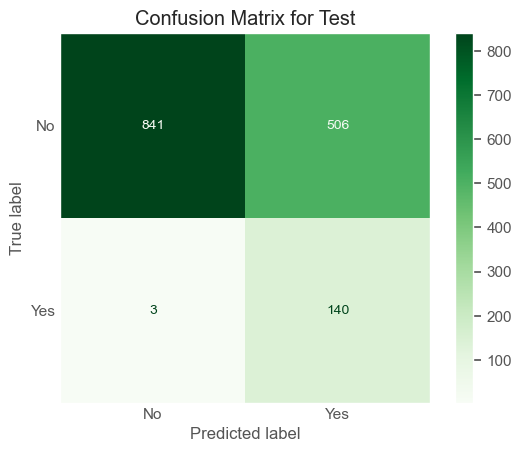

In [641]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False,class_weight={0:0.15,1:0.85})
model  = lr.fit(X_train_scaled_df,Y_train)

statmodel=0  #0 for sklearn and 1 for statmodel

# Verifions la performances de ce  model 
scores_Sklearn = get_metrics_score(model,X_train_scaled_df,X_test_scaled_df,Y_train,Y_test,statmodel)


In [642]:
add_score_model(scores_Sklearn)


Logistic Regression (Avec  Statmodel)



Optimization terminated successfully.
         Current function value: 0.116650
         Iterations 9
 MODEL PERFORMANCE
 Accuracy   : Train: 0.957  Test:  0.961
 Recall     : Train: 0.662  Test: 0.72
 Precision  : Train: 0.86  Test:  0.851
 F1         : Train: 0.748  Test: 0.78


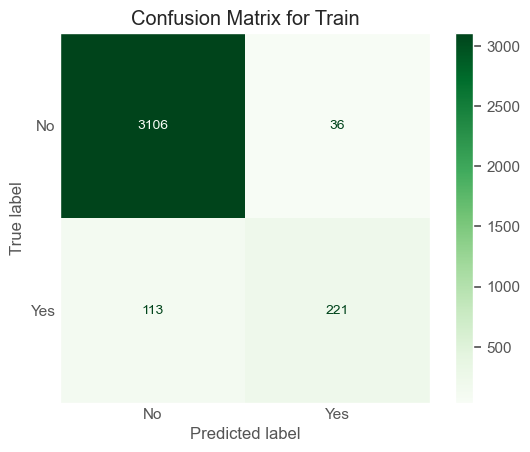

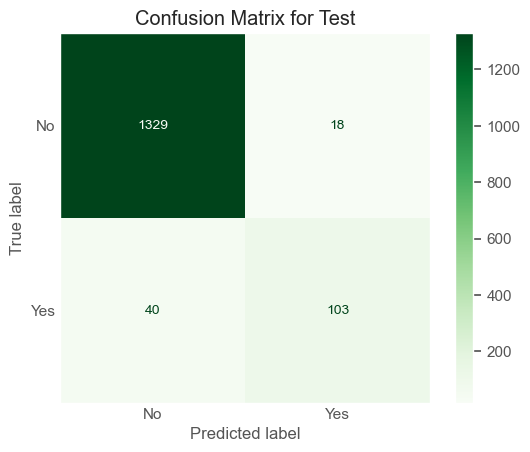

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3476
Model:                          Logit   Df Residuals:                     3459
Method:                           MLE   Df Model:                           16
Date:                Mon, 05 Jun 2023   Pseudo R-squ.:                  0.6313
Time:                        21:34:48   Log-Likelihood:                -405.48
converged:                       True   LL-Null:                       -1099.8
Covariance Type:            nonrobust   LLR p-value:                4.457e-286
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.1691      0.228    -22.675      0.000      -5.616      -4.722
ID                             0.0039      0.094      0.041      0.967      -0.181       0.188
Age                            0.1632      0.093      1.756      0.079      -0.019       0.345
Income                         2.8963      0.170     17.070      0.000       2.564       3.229
Family                         0.7764      0.107      7.247      0.000       0.566       0.986
CCAvg                          0.2710      0.092      2.951      0.003       0.091       0.451
Mortgage                       0.0811      0.072      1.125      0.261      -0.060       0.223
SecuritiesAccount             -0.2182      0.108     -2.018      0.044      -0.430      -0.006
CDAccount                      0.9014      0.097      9.318      0.000       0.712       1.091
Online                        -0.3441      0.097     -3.544      0.000      -0.534      -0.154
CreditCard                    -0.3932      0.116     -3.390      0.001      -0.621      -0.166
Regions_Central               -0.0650      0.105     -0.622      0.534      -0.270       0.140
Regions_Los Angeles Region     0.0404      0.100      0.406      0.685      -0.155       0.236
Regions_Southern               0.0671      0.105      0.639      0.523      -0.139       0.273
Regions_Superior              -0.1929      0.151     -1.277      0.202      -0.489       0.103
Education_2                    1.8075      0.146     12.372      0.000       1.521       2.094
Education_3                    1.9136      0.148     12.963      0.000       1.624       2.203
==============================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [644]:
# adding constant to training and test set
X_train_stat = sm.add_constant(X_train_scaled_df)
X_test_stat = sm.add_constant(X_test_scaled_df)
statmodel=1  #0 for sklearn and 1 for statmodel
logit = sm.Logit( Y_train, X_train_stat.astype(float) )
lg = logit.fit(warn_convergence=False)

# Verifions la performance de ce modèl
scores_statmodel = get_metrics_score(lg,X_train_stat,X_test_stat,Y_train,Y_test,statmodel)
lg.summary() 


In [464]:
X_train1 = X_train_stat.drop(['Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'], axis = 1)
X_test1= X_test_stat.drop(['Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'], axis = 1)
logit1 = sm.Logit(Y_train, X_train1.astype(float))
lg1 = logit1.fit(warn_convergence =False)

lg1.summary()


Optimization terminated successfully.
         Current function value: 0.117117
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3476
Model:                          Logit   Df Residuals:                     3463
Method:                           MLE   Df Model:                           12
Date:                Sun, 04 Jun 2023   Pseudo R-squ.:                  0.6298
Time:                        12:55:25   Log-Likelihood:                -407.10
converged:                       True   LL-Null:                       -1099.8
Covariance Type:            nonrobust   LLR p-value:                1.935e-289
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1367      0.225    -22.819      0.000      -5.578      -4.695
ID                    0.0016      0.094      0.017      0.986      -0.182       0.186
Age                   0.1637      0.093      1.767      0.077      -0.018       0.345
Income                2.8858      0.169     17.118      0.000       2.555       3.216
Family                0.7707      0.107      7.210      0.000       0.561       0.980
CCAvg                 0.2686      0.092      2.935      0.003       0.089       0.448
Mortgage              0.0776      0.072      1.081      0.280      -0.063       0.218
SecuritiesAccount    -0.2150      0.108     -1.982      0.047      -0.428      -0.002
CDAccount             0.8967      0.096      9.305      0.000       0.708       1.086
Online               -0.3437      0.097     -3.550      0.000      -0.533      -0.154
CreditCard           -0.3966      0.116     -3.419      0.001      -0.624      -0.169
Education_2           1.7981      0.146     12.352      0.000       1.513       2.083
Education_3           1.9092      0.147     12.952      0.000       1.620       2.198
=====================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [465]:
 X_train2 = X_train1.drop(['Mortgage'], axis = 1)
 X_test2= X_test1.drop(['Mortgage'], axis = 1)
 logit2 = sm.Logit(Y_train, X_train2.astype(float))
 lg2 = logit2.fit()
 lg2.summary()

Optimization terminated successfully.
         Current function value: 0.117284
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3476
Model:                          Logit   Df Residuals:                     3464
Method:                           MLE   Df Model:                           11
Date:                Sun, 04 Jun 2023   Pseudo R-squ.:                  0.6293
Time:                        12:55:26   Log-Likelihood:                -407.68
converged:                       True   LL-Null:                       -1099.8
Covariance Type:            nonrobust   LLR p-value:                2.999e-290
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1297      0.225    -22.841      0.000      -5.570      -4.690
ID                   -0.0032      0.094     -0.035      0.972      -0.187       0.180
Age                   0.1598      0.093      1.728      0.084      -0.022       0.341
Income                2.9039      0.168     17.280      0.000       2.575       3.233
Family                0.7769      0.107      7.268      0.000       0.567       0.986
CCAvg                 0.2566      0.091      2.826      0.005       0.079       0.435
SecuritiesAccount    -0.2144      0.108     -1.977      0.048      -0.427      -0.002
CDAccount             0.8977      0.097      9.301      0.000       0.708       1.087
Online               -0.3417      0.097     -3.535      0.000      -0.531      -0.152
CreditCard           -0.3961      0.116     -3.423      0.001      -0.623      -0.169
Education_2           1.7877      0.145     12.333      0.000       1.504       2.072
Education_3           1.8965      0.146     12.946      0.000       1.609       2.184
=====================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [466]:
 X_train3 = X_train2.drop(['Age'], axis = 1)
 X_test3= X_test2.drop(['Age'], axis = 1)
 logit3 = sm.Logit(Y_train, X_train3.astype(float))
 lg3 = logit3.fit()
 lg3.summary()


Optimization terminated successfully.
         Current function value: 0.117716
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3476
Model:                          Logit   Df Residuals:                     3465
Method:                           MLE   Df Model:                           10
Date:                Sun, 04 Jun 2023   Pseudo R-squ.:                  0.6280
Time:                        12:55:27   Log-Likelihood:                -409.18
converged:                       True   LL-Null:                       -1099.8
Covariance Type:            nonrobust   LLR p-value:                1.106e-290
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1109      0.223    -22.905      0.000      -5.548      -4.674
ID                   -0.0060      0.093     -0.065      0.948      -0.189       0.177
Income                2.8944      0.168     17.278      0.000       2.566       3.223
Family                0.7759      0.107      7.257      0.000       0.566       0.985
CCAvg                 0.2384      0.090      2.635      0.008       0.061       0.416
SecuritiesAccount    -0.2160      0.108     -1.998      0.046      -0.428      -0.004
CDAccount             0.9031      0.096      9.399      0.000       0.715       1.091
Online               -0.3385      0.096     -3.508      0.000      -0.528      -0.149
CreditCard           -0.3929      0.115     -3.405      0.001      -0.619      -0.167
Education_2           1.7874      0.145     12.338      0.000       1.503       2.071
Education_3           1.8875      0.146     12.933      0.000       1.601       2.174
=====================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

 MODEL PERFORMANCE
 Accuracy   : Train: 0.956  Test:  0.96
 Recall     : Train: 0.662  Test: 0.741
 Precision  : Train: 0.85  Test:  0.822
 F1         : Train: 0.744  Test: 0.779


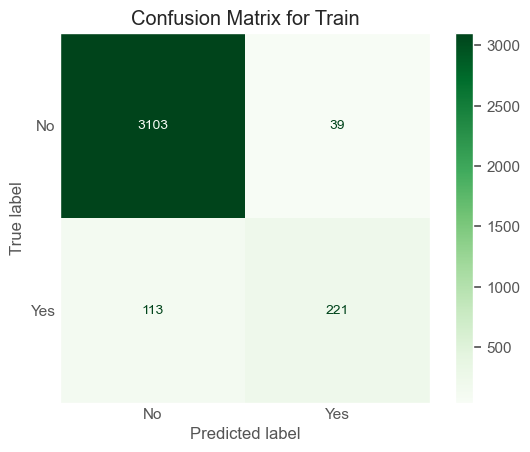

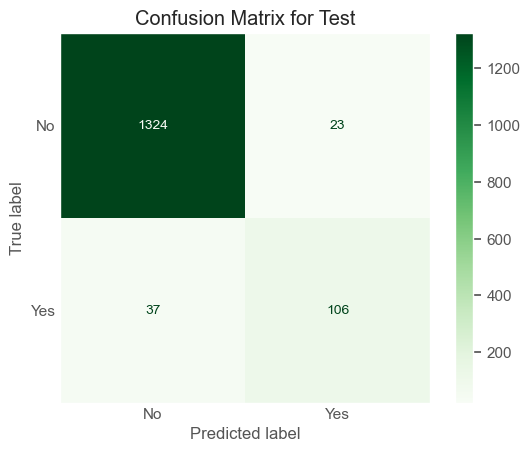

In [467]:
scores_statmodel = get_metrics_score(lg3,X_train3,X_test3,Y_train,Y_test,statmodel)
add_score_model(scores_statmodel)

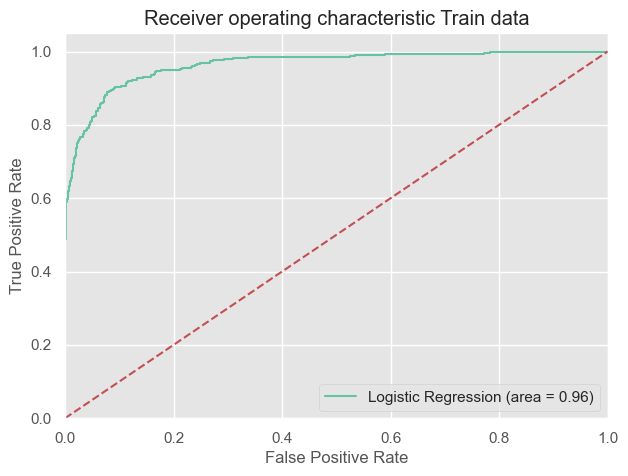

In [468]:
logit_roc_auc_train = roc_auc_score(Y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(Y_train, lg3.predict(X_train3))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Train data')
plt.legend(loc="lower right")
plt.show()


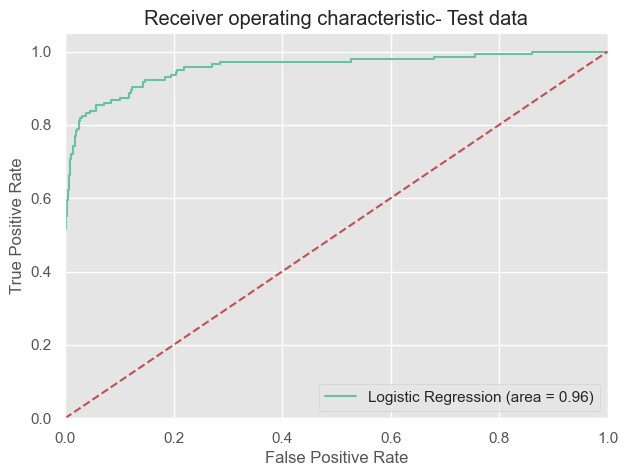

In [469]:
logit_roc_auc_test = roc_auc_score(Y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(Y_test, lg3.predict(X_test3))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- Test data')
plt.legend(loc="lower right")
plt.show()

le model de regression logistique donne une performance généralisée sur l'entrainement et l'ensemble de test


Le score ROC_AUG de 0.96 sur l'entrainement et l'ensemble de test est assez bon

Le coefficient de revenu de l'education de la famille du compte CCAvg ,CD, de l'âge sont positifs une augmentation d'une unité 
de ceux ci entrainera une augmentation des chances qu'une personne emprunte un prêt 

Le coefficient de compte titre Achat en ligne,les cartes de credit sont negatifs ,l'augmentation de ceux-ci entrainera une diminution des chances qu'une personne emprunte un prêt

**On va convertir en coefficient de cotes pour voir le nombre de chance qu'un client contracté un prêt**

Les coefficient du modele de régression logistique sont en termes de loglodd pour trouver les chances que nous avons besoin 

par conséquent les cotes =exp(b)

On va calculez la probabilité a partir du rapport de cotes en utilisant la formule de probabilité =odds ratio/(1+codds)

le changement en pourcentage des cotes est donné sous forme de odds =(exp(b)-1)*100


In [471]:
#Calcul Odds Ratio, probability
##création d'un data frame pour rassemble odds ratio ,probabilite et p-value du coef
lgcoef=pd.DataFrame(lg3.params,columns=['coef'])
lgcoef.loc[:,"Odds Ratio"] = np.exp(lgcoef.coef)
lgcoef["Probalility"]=lgcoef["Odds Ratio"]/(1+lgcoef['Odds Ratio'])
lgcoef['Percentage Change Of Odds']=(np.exp(lg3.params)-1)*100
lgcoef['pval']=lg3.pvalues
pd.options.display.float_format = '{:.2f}'.format
lgcoef = lgcoef.sort_values(by="Odds Ratio", ascending=False)
lgcoef


,coef,Odds Ratio,Probalility,Percentage Change Of Odds,pval
Income,2.89,18.07,0.95,1707.25,0.00
Education_3,1.89,6.60,0.87,560.25,0.00
Education_2,1.79,5.97,0.86,497.36,0.00
CDAccount,0.90,2.47,0.71,146.73,0.00
Family,0.78,2.17,0.68,117.25,0.00
CCAvg,0.24,1.27,0.56,26.92,0.01
ID,-0.01,0.99,0.50,-0.60,0.95
SecuritiesAccount,-0.22,0.81,0.45,-19.43,0.05
Online,-0.34,0.71,0.42,-28.71,0.00
CreditCard,-0.39,0.68,0.40,-32.49,0.00


**Income**: en maitenant toutes les caracteristiques constantes  un changement de revenu augmentera les chances qu'un client
contracté un prêt personnel de 18 fois avec un taux de probabilité 95% de chances

**Family**en maintenant toutes les caracteristiques  un changement d'une unité dans la famille augmentera les chances qu'un client contracté un prêt est de 2.17 fois

**CCAvg** en maintenant toutes les caracteristiques constantes un changement d'une unité de CCAvg augmentera les chances qu'un client contracté un prêt personnel de 1.27fois  ou une augmentation de 26.92%

Education Advance a 6.60 fois plus de chances de contracter un prêt personnel qu'un étudiant de premier cycle.
    

**Les variables globales les plus significatives sont le revenu, l'éducation, le compte CD, la famille et la CCAvg**

# Évaluation et amélioration des performances du modèle

 MODEL PERFORMANCE
 Accuracy   : Train: 0.956  Test:  0.96
 Recall     : Train: 0.662  Test: 0.741
 Precision  : Train: 0.85  Test:  0.822
 F1         : Train: 0.744  Test: 0.779


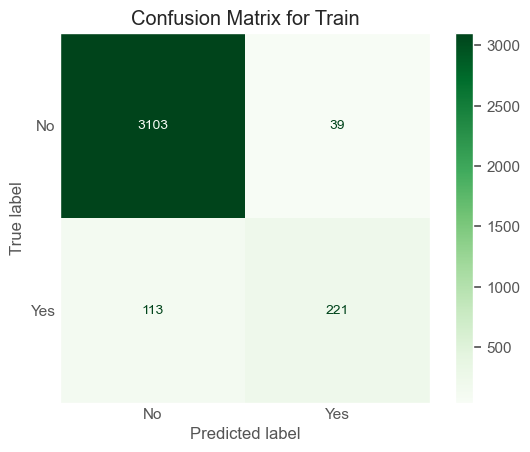

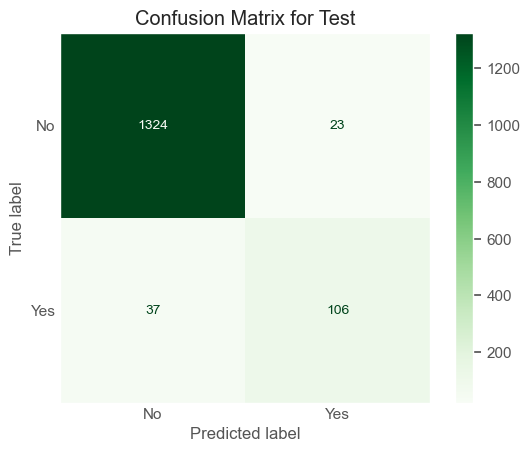

In [646]:
 score_lr=get_metrics_score(lg3,X_train3,X_test3,Y_train,Y_test,statmodel)


**Interpretation**

**TRUE POSITIVE :** Pour un client qui veut prendre un prêt personnel d'apres le model la prediction est bonne

**TRUE NEGATIF :** le model prédit que les clients qui veulent prendre un prêt personnel alors que c'est pas vrai n'affecte pas l'entreprise 

**FALSE NEGATIF:** Le client ne prendra pas de prêt personnel. Résultat : Le client potentiel est manqué par l'équipe de vente. C'est une perte d'opportunité. Le but de la campagne était de cibler ces clients. Si l'équipe était au courant de ces clients, elle aurait pu offrir de bons taux d'intérêt.

**FALSE POSITIVE:** d'apres la prédiction du modèl L'équipe qui cible les clients potentiels gaspillerait ses ressources sur les clients qui n'achèteront pas de prêt personnel.

**Bonne metrique a utiliser **

On remarqué lors de l'entrainement les faux negatifs sont de 113 alors que lors du test ils ont a 37 ont peut encore améliorer
ce score en utilisant le seuil optimal pour la courbe ROC AUC et la courbe de recall de précision

In [648]:
# Seuil optimal selon la courbe AUC-ROC
# La coupure optimale serait là où tpr est élevé et fpr est bas
fpr, tpr, seuils = metrics.roc_curve(Y_test, lg2.predict(X_test2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.13298352677463857


 MODEL PERFORMANCE
 Accuracy   : Train: 0.919  Test:  0.921
 Recall     : Train: 0.88  Test: 0.853
 Precision  : Train: 0.551  Test:  0.56
 F1         : Train: 0.677  Test: 0.676


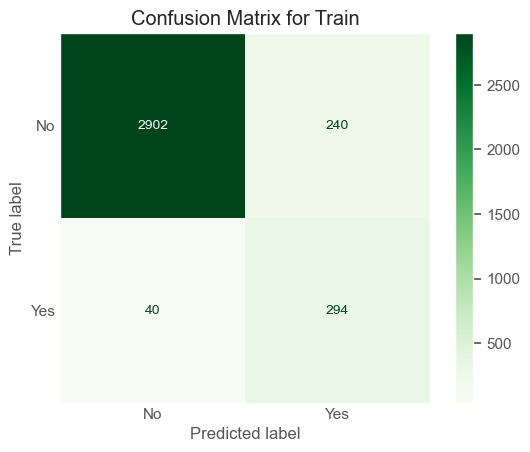

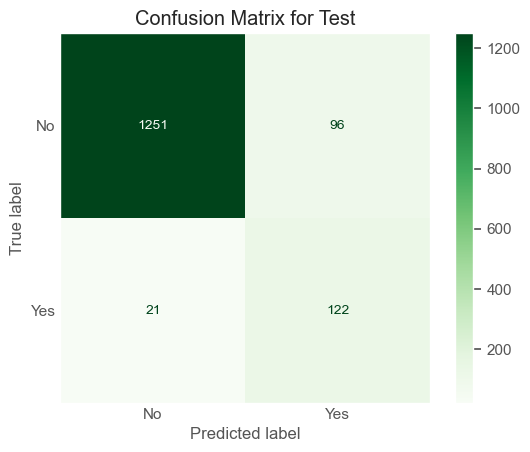

 ROC-AUC Score  :Train::  0.902  Test::  0.891


In [649]:
score_statmodel=get_metrics_score(lg3,X_train3,X_test3,Y_train,Y_test,statmodel
                                  ,threshold=optimal_threshold_auc_roc,roc=True)

Avec un seuil de 0,132, le score de recall est passé de 66 % à 85 %
sur les données de test avec une précision de 89 %. De plus, les valeurs de faux négatifs
sont passées de 40 à 21 pour test dat. Le score ROC-AUC est de 89, ce qui est bon

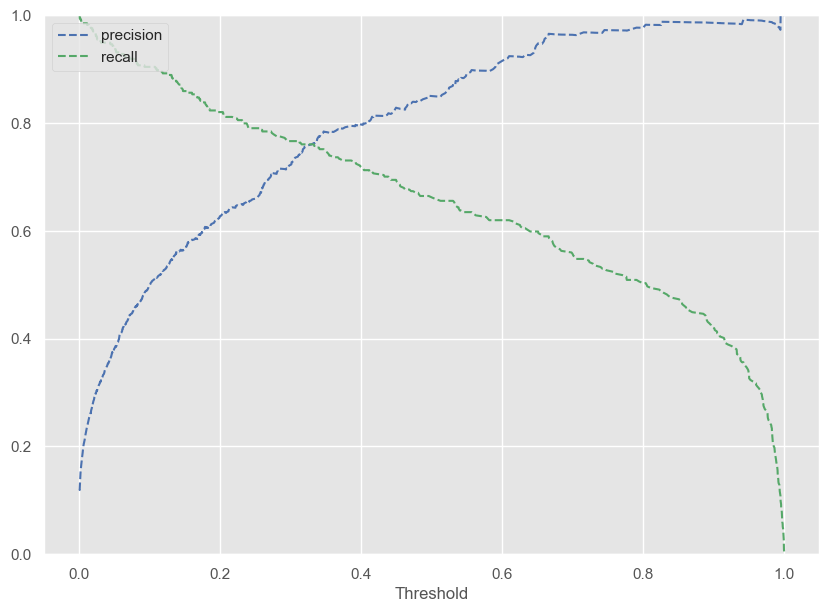

In [650]:
y_scores=lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(Y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()


 MODEL PERFORMANCE
 Accuracy   : Train: 0.949  Test:  0.956
 Recall     : Train: 0.766  Test: 0.818
 Precision  : Train: 0.723  Test:  0.745
 F1         : Train: 0.744  Test: 0.78


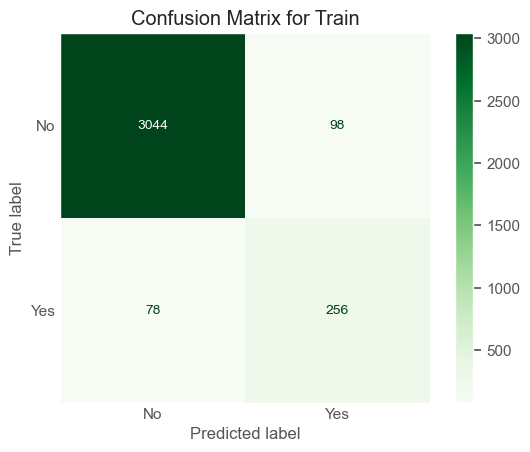

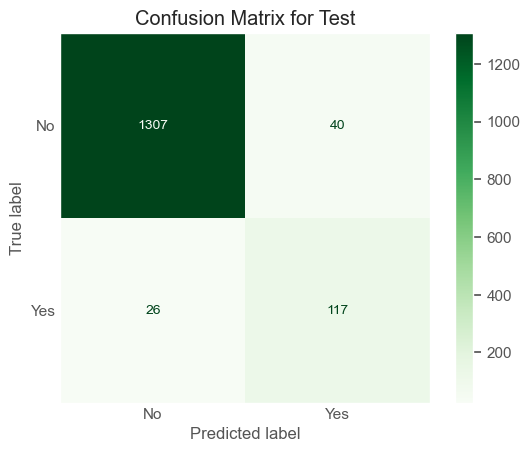

 ROC-AUC Score  :Train::  0.868  Test::  0.894


In [651]:
optimal_threshold_curve = 0.3

scores_opt_curve = get_metrics_score(lg3,X_train3,X_test3,Y_train,Y_test,statmodel,threshold=optimal_threshold_curve,roc=True)
add_score_model(scores_opt_curve)

Avec ce model le taux de faux negatifs a augmenté et le recall est 81  avec une precision 95 
le model fonctionne sur l'ensemble des données d'entrainement et du test.Le model donne une performance équilibrée, si la banque souhaite maintenir un équilibre entre le recall et la précision, ce modèle peut être utilisé. L'aire sous la courbe a diminué par rapport au modèle initial mais les performances sont généralisées sur l'ensemble d'apprentissage et de test.

#  Sequential Feature Selection

In [490]:
X_train_seq=X_train_stat
X_test_seq=X_test_stat

In [495]:
#installation de m1xtend
pip install mlxtend


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.7 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [652]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.lin
X_train_seq.shape

(3476, 17)

In [653]:
statmodel=0
clf=LogisticRegression(solver="newton-cg",random_state=1,fit_intercept=False)
sfs1=sfs(clf,k_features = 17,forward=True,
        floating=False,scoring="recall",verbose=2,cv=5)
sfs1=sfs1.fit(X_train_seq,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.3s finished

[2023-06-05 22:14:34] Features: 1/17 -- score: 0.9910447761194028[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished

[2023-06-05 22:14:34] Features: 2/17 -- score: 0.9970149253731343[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.5s finished

[2023-06-05 22:14:35] Features: 3/17 -- score: 0.9970149253731343[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [654]:
clf = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
# Build step forward feature selection
sfs1 = sfs(clf,k_features = 11,forward=True,
           floating=False, scoring= 'recall',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_seq, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.3s finished

[2023-06-05 22:14:53] Features: 1/11 -- score: 0.9910447761194028[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished

[2023-06-05 22:14:54] Features: 2/11 -- score: 0.9970149253731343[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished

[2023-06-05 22:14:54] Features: 3/11 -- score: 0.9970149253731343[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [655]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)


[1, 2, 3, 5, 6, 7, 8, 9, 11, 13, 14]


In [656]:
X_train_seq.columns[feat_cols]

Index(['ID', 'Age', 'Income', 'CCAvg', 'Mortgage', 'SecuritiesAccount',
       'CDAccount', 'Online', 'Regions_Central', 'Regions_Southern',
       'Regions_Superior'],
      dtype='object')

In [657]:
X_train_final=X_train_seq[X_train_seq.columns[feat_cols]]
X_test_final=X_test_seq[X_train_final.columns]

In [658]:
X_train_final

,ID,Age,Income,CCAvg,Mortgage,SecuritiesAccount,CDAccount,Online,Regions_Central,Regions_Southern,Regions_Superior
0,-1.03,1.37,0.83,-0.14,-0.56,-0.34,-0.25,-1.22,-0.30,-0.63,-0.13
1,1.67,-0.21,1.02,-0.71,-0.56,-0.34,4.02,0.82,-0.30,-0.63,-0.13
2,-1.20,0.06,1.96,3.26,-0.56,-0.34,4.02,0.82,-0.30,-0.63,-0.13
3,1.09,-0.65,-0.55,0.50,-0.56,-0.34,-0.25,-1.22,-0.30,1.58,-0.13
4,-0.51,0.67,2.58,-0.14,5.33,-0.34,-0.25,0.82,-0.30,-0.63,-0.13
...,...,...,...,...,...,...,...,...,...,...,...
3471,-0.83,1.28,1.55,2.86,3.17,-0.34,-0.25,-1.22,3.28,-0.63,-0.13
3472,-0.06,0.76,-0.63,-0.60,-0.56,-0.34,-0.25,-1.22,-0.30,1.58,-0.13
3473,0.98,1.37,1.05,2.34,-0.56,-0.34,-0.25,0.82,-0.30,-0.63,-0.13
3474,-0.17,-1.70,-0.50,0.38,-0.56,-0.34,-0.25,0.82,-0.30,1.58,-0.13


 MODEL PERFORMANCE
 Accuracy   : Train: 0.717  Test:  0.719
 Recall     : Train: 0.994  Test: 0.972
 Precision  : Train: 0.253  Test:  0.251
 F1         : Train: 0.403  Test: 0.399


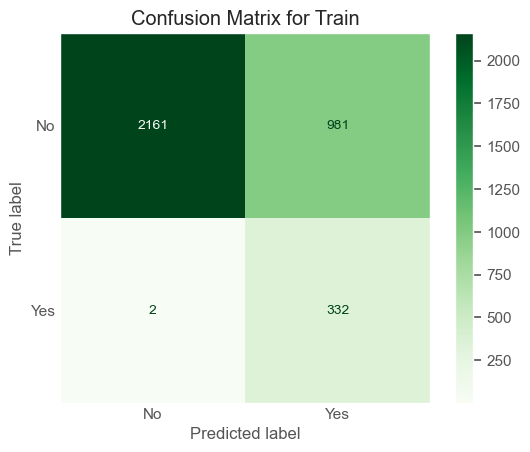

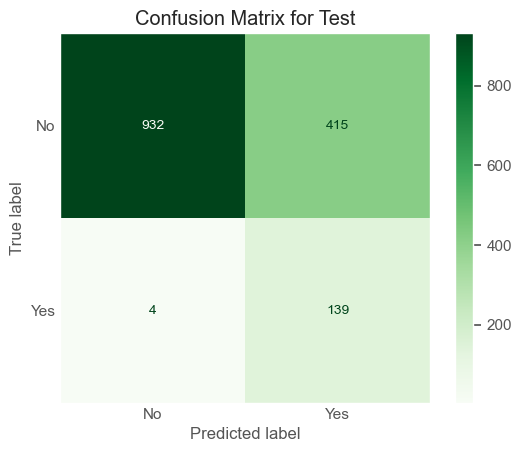

In [659]:
lr=LogisticRegression(solver="newton-cg",random_state=1,fit_intercept=False)
model=lr.fit(X_train_final,Y_train)
statmodel=0
scores_sfs=get_metrics_score(model,X_train_final,X_test_final,Y_train,Y_test,statmodel)
add_score_model(scores_sfs)

In [526]:
df_Decision=df_loan.copy()
df_Decision

,ID,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Regions
0,1,25,49,4,1.60,1,0,0,1,0,0,0,Los Angeles Region
1,2,45,34,3,1.50,1,0,0,1,0,0,0,Los Angeles Region
2,3,39,11,1,1.00,1,0,0,0,0,0,0,Bay Area
3,4,35,100,1,2.70,2,0,0,0,0,0,0,Bay Area
4,5,35,45,4,1.00,2,0,0,0,0,0,1,Los Angeles Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,1,1.90,3,0,0,0,0,1,0,Southern
4996,4997,30,15,4,0.40,1,85,0,0,0,1,0,Southern
4997,4998,63,24,2,0.30,3,0,0,0,0,0,0,Southern
4998,4999,65,49,3,0.50,2,0,0,0,0,1,0,Los Angeles Region


# Arbre de décision de construction de modèles

In [530]:
X_dt=df_Decision.drop('PersonalLoan',axis=1)
Y_dt=df_Decision['PersonalLoan']

In [543]:
oneHotCols=X_dt.select_dtypes(exclude='number').columns.to_list()
X_dt=pd.get_dummies(X_dt,columns=oneHotCols,drop_first=True)

X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X_dt, Y_dt, test_size=0.3, random_state=1, stratify=Y_dt)

Nous utilisons des critères de « gini » pour diviser.
Si la fréquence de la classe A est de 10 % et la fréquence de la classe B est de 90 %, alors la classe B deviendra la classe dominante et l'arbre de décision sera biaisé en faveur des classes dominantes.

Pour gérer cet ensemble de données déséquilibré, nous pouvons passer un dictionnaire {0:0.15,1:0.85} au modèle pour spécifier le poids de chaque classe et l'arbre de décision donnera plus de poids à la classe 1.

class_weight est un hyperparamètre pour le classificateur d'arbre de décision.

Étant donné que ne pas être en mesure d'identifier un client potentiel est la plus grande perte, comme mentionné précédemment avec la régression logistique. Par conséquent, le rappel est la bonne métrique pour vérifier les performances du modèle.

In [661]:
def get_recall_score(model):
    '''
    model : classifier pour predire la valeur de x

    '''
    ytrain_predict = model.predict(X_train_dt)
    ytest_predict = model.predict(X_test_dt)
    # accuracy on training set
    print("\x1b[0;30;47m \033[1mAccuracy : Train :\033[0m", 
          model.score(X_train_dt,Y_train_dt),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
            model.score(X_test_dt,Y_test_dt))
# accuracy on training set
    print("\x1b[0;30;47m \033[1mRecall   : Train :\033[0m", 
          metrics.recall_score(Y_train_dt,ytrain_predict),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          metrics.recall_score(Y_test_dt,ytest_predict))
    make_confusion_matrix(Y_train_dt,ytrain_predict,"Confusion Matric on Train Data")
    make_confusion_matrix(Y_test_dt,ytest_predict,"Confusion Matric on Test Data")


 Accuracy : Train : 1.0  Test: 0.9805369127516779
 Recall   : Train : 1.0  Test: 0.8741258741258742


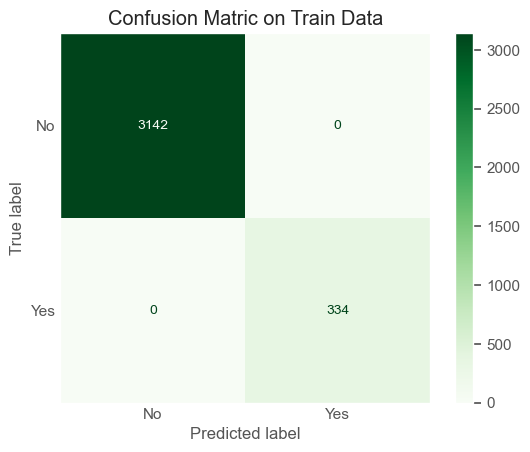

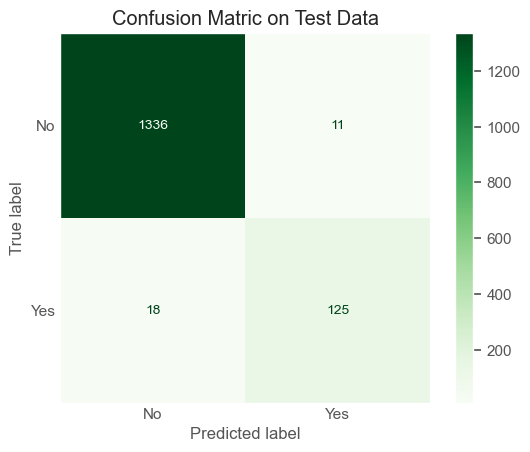

In [662]:
model=DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85}, random_state=1)
model.fit(X_train_dt,Y_train_dt)
get_recall_score(model)


L'arbre de décision a tendance à sur-ajuster et la disparité entre le rappel sur le train et le test suggère que le modèle est sur-ajusté

**Creation du model avec  0.002 ccp_alpha**

In [663]:
best_model=DecisionTreeClassifier(ccp_alpha=0.002,
                                  class_weight={0:0.15,1:0.85},random_state=1
)
best_model.fit(X_train_dt,Y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

 Accuracy : Train : 0.9697928653624857  Test: 0.9671140939597316
 Recall   : Train : 1.0  Test: 0.965034965034965


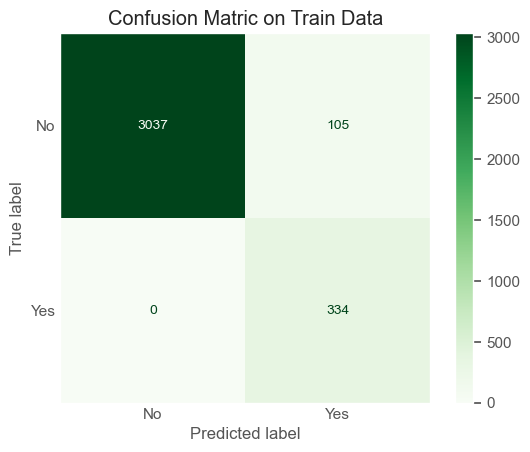

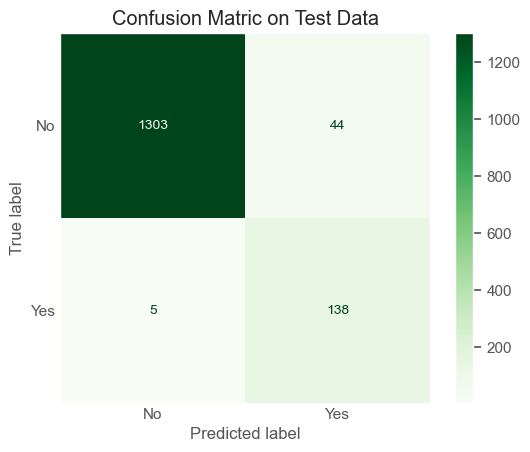

In [664]:
get_recall_score(best_model)

le recall sur train et test nous indique le model que nous avons utilisé généralisé
avec une precision de 96% et une reduction du taux de faux negatfis

In [555]:
column_names = list(X_dt.columns)
feature_names = column_names

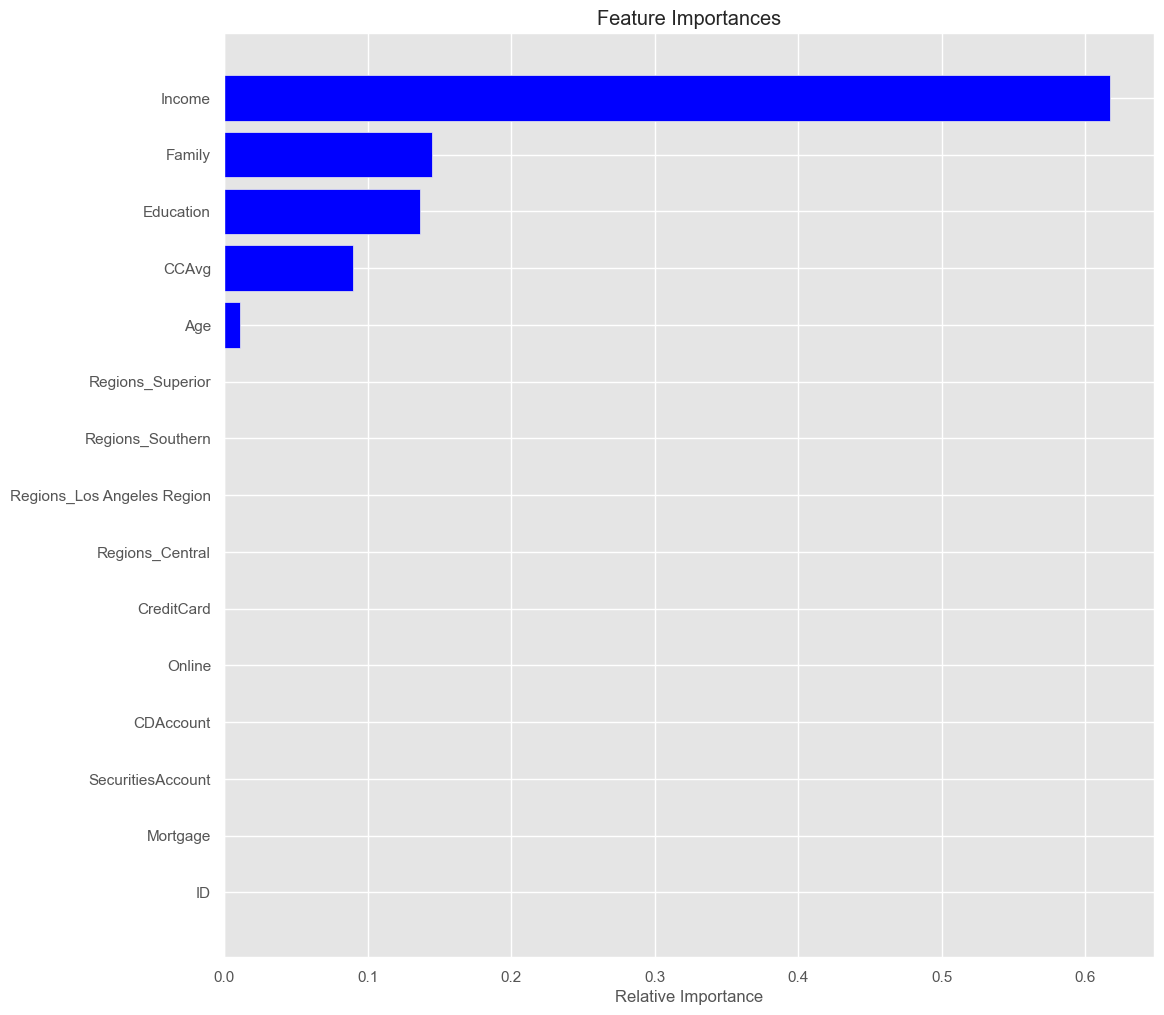

In [667]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Nous obtenons un rappel plus élevé sur les données de test entre 0,002 et 0,005. on a choisi alpha comme 0,002.
Le recall sur le train et le test indiquent que nous avons créé un modèle généralisé. avec une précision de 96 % et une réduction des faux négatifs.
Caractéristiques importantes : Revenu, Études supérieures, Membre de la famille 3 et 4, Ccavg, Études supérieures, Âge.
C'est le meilleur modèle car le faux négatif n'est que de 5 sur Test donnée.

**Comparaison de tous les  modeles sur leurs performance**

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1347
           1       0.76      0.97      0.85       143

    accuracy                           0.97      1490
   macro avg       0.88      0.97      0.92      1490
weighted avg       0.97      0.97      0.97      1490



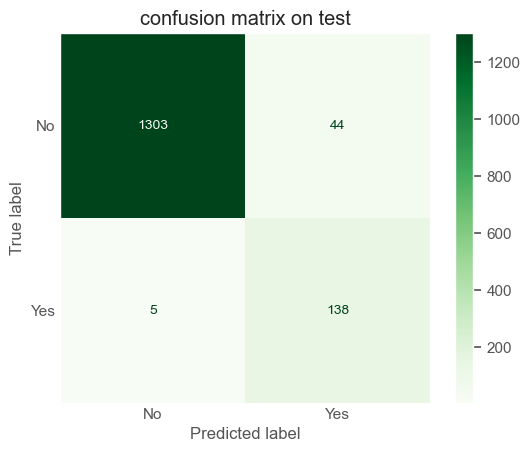

In [665]:
y_pred = best_model.predict(X_test_dt)
print(classification_report(Y_test_dt,y_pred))
make_confusion_matrix(Y_test,y_pred,"confusion matrix on test")



apres le post Pruning notre faux negatif  est a 5. l'accuracy est a 97% sur le test data  et le recall est a 97%
apres d'avoir choisir l'optimal cc-alpha

Nous avons analysé les données de la campagne de prêt personnel à l'aide de l'EDA et en utilisant différents modèles tels que la régression logistique et le classificateur d'arbre de décision pour créer une probabilité que le client achète un prêt.
Nous avons d'abord construit un modèle à l'aide de la régression logistique et la mesure de performance utilisée était le rappel. Les caractéristiques les plus importantes pour la classification étaient le revenu, l'éducation, le compte CD, la famille et la CCAvg.
Coefficient de revenu, études supérieures, famille_3, famille 4, CCavg, compte CD, âge, sont positifs, c'est-à-dire qu'une augmentation d'une unité de ceux-ci entraînera une augmentation des chances qu'une personne emprunte un prêt
Coefficient de compte de titres,achat en ligne, carte de crédit Family_2 sont une augmentation négative de ceux-ci entraînera une diminution des chances qu'une personne emprunte un prêt.
Nous avons également amélioré les performances en utilisant la courbe ROC-AUC et le seuil optimal. C'était le meilleur modèle avec un recall et une précision élevés.
L'arbre de décision peut facilement surdimensionner. Ils nécessitent moins de prétraitement des données que la régression logistique et sont faciles à comprendre.
Nous avons utilisé des arbres de décision avec pré-Pruning et post-Pruning. Le modèle post-Pruning a donné un recall de 96 % avec une précision de 97 %.
Le revenu, les clients diplômés, les clients ayant 3 membres de la famille sont quelques-unes des variables les plus importantes pour prédire si les clients achèteront un prêt personnel.

# Recommandations

Les arbres de décision ne nécessitent pas beaucoup de préparation de données ou de traitement des valeurs aberrantes comme la régression logistique. Ils sont faciles à comprendre. L'arbre de décision peut facilement sur-adapter, nous devons donc être prudents en utilisant l'arbre de décision.
Basé sur l'EDA, la régression logistique, l'arbre de décision, le revenu, l'éducation, la famille, la CCavg sont les facteurs les plus importants.
Les clients qui ont un revenu supérieur à 98 000 dollars, une éducation de niveau avancé/diplômé, une famille de plus de 2 personnes, ces clients ont plus de chances de contracter des prêts personnels.
Ainsi, pour cette campagne, nous pouvons avoir différents profils de clients.
Clients de haut profil :-revenu plus élevé, éducation de niveau avancé/diplômé, 3/4 membres de la famille, dépenses élevées
Profil moyen :- Groupe à revenu moyen, Études supérieures.3/4 Membres de la famille, dépenses moyennes
Profil bas : - Groupe à faible revenu, étudiants de premier cycle, membre de la famille 3/4, faibles dépenses
Les dépenses moyennes des clients et les prêts hypothécaires peuvent également être considérés comme basés sur l'EDA et la régression logistique. Ces paramètres jouent également un certain rôle dans la probabilité d'achat d'un prêt.
Nous pouvons d'abord cibler les clients de haut niveau, en leur fournissant un gestionnaire de relations personnelles qui peut répondre à leurs préoccupations et peut les poursuivre pour acheter un prêt auprès de la banque avec des taux d'intérêt complets.
La préqualification pour un prêt peut également attirer plus de clients.
Notre deuxième cible serait les clients à profil moyen.
Le modèle ne peut pas bien identifier s'il existe des cas exceptionnels où un client discret est prêt à acheter un prêt personnel